In [1]:
##read from csv
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
directory=r"csv_files"
    # Open file
   # sacct=pd.read_csv(directory+'/'+name,sep='|')


                              Location       Type  \
Timestamp                                           
2024-07-17 15:05:53.333858564  x1203c7  Enclosure   
2024-07-17 15:05:53.525687269  x1203c7  Enclosure   
2024-07-17 15:05:53.793714224  x1203c7  Enclosure   
2024-07-17 15:05:54.237709544  x1203c7  Enclosure   
2024-07-17 15:05:54.481700259  x1203c7  Enclosure   
...                                ...        ...   
2024-07-17 16:34:41.185718432  x1100c1        CDU   
2024-07-17 16:34:41.188039478  x1100c1        CDU   
2024-07-17 16:34:41.261952060  x1100c1  Enclosure   
2024-07-17 16:34:41.457980624  x1100c1  Enclosure   
2024-07-17 16:34:41.533933586  x1100c1  Enclosure   

                                                         ReadingType  Measure  \
Timestamp                                                                       
2024-07-17 15:05:53.333858564                   Rectifier2InputPower    Power   
2024-07-17 15:05:53.525687269                   Rectifier1InputPowe

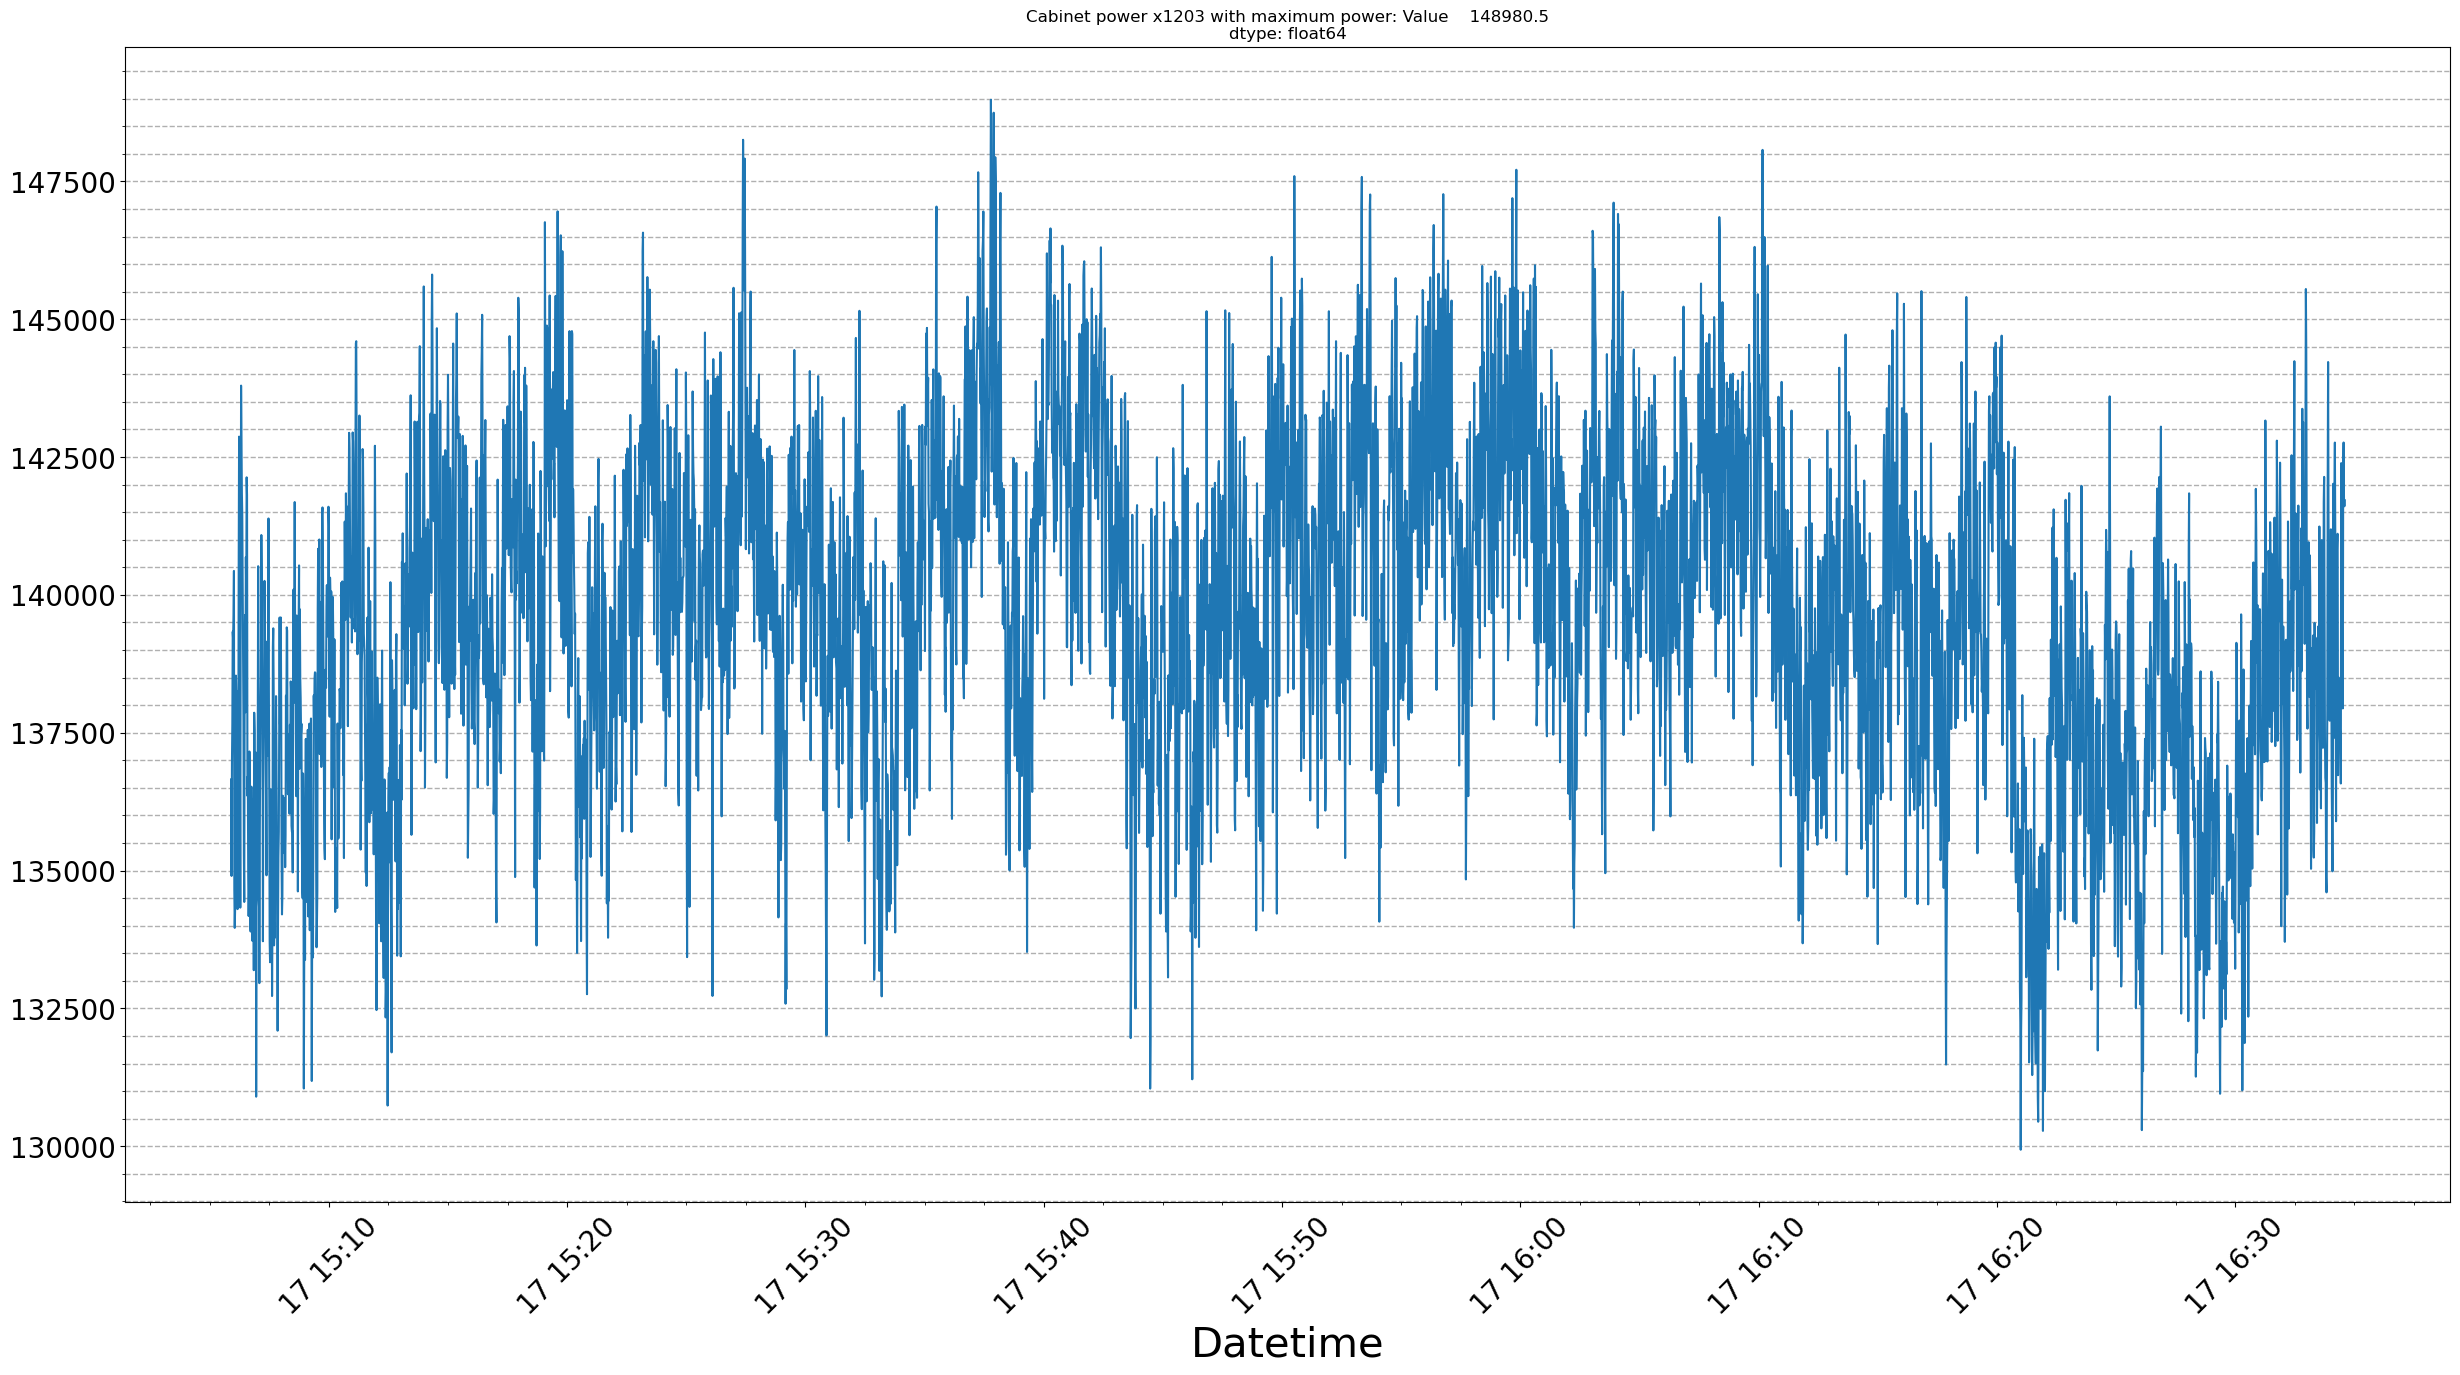

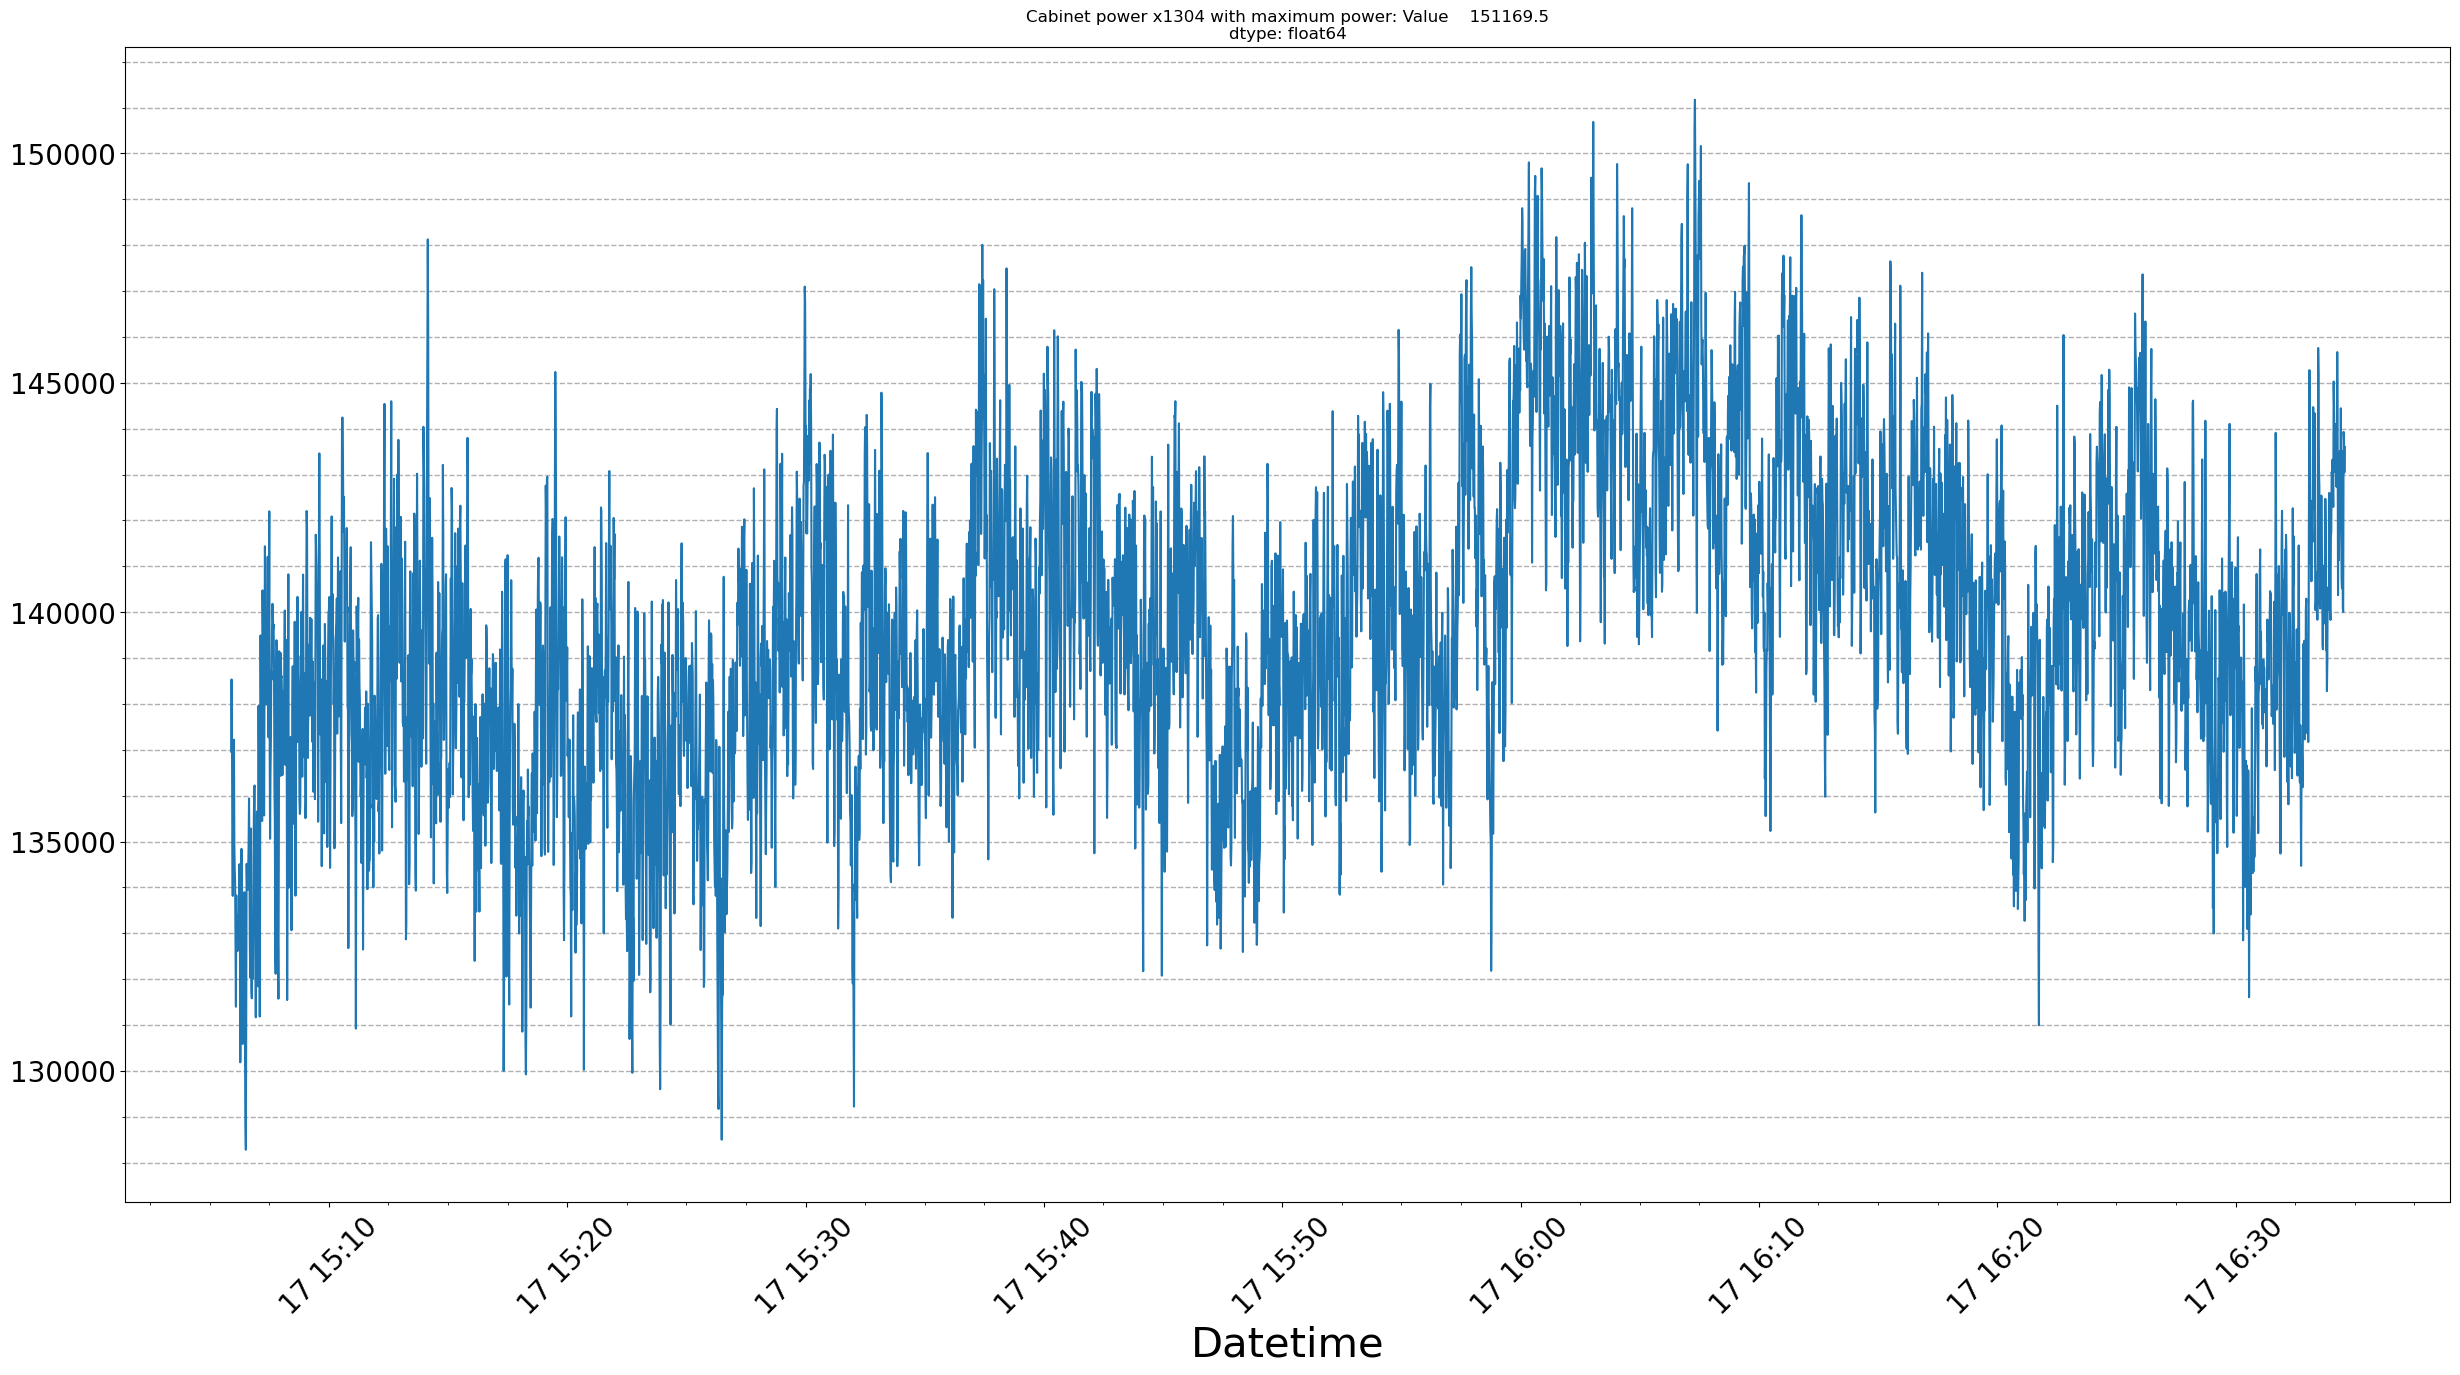

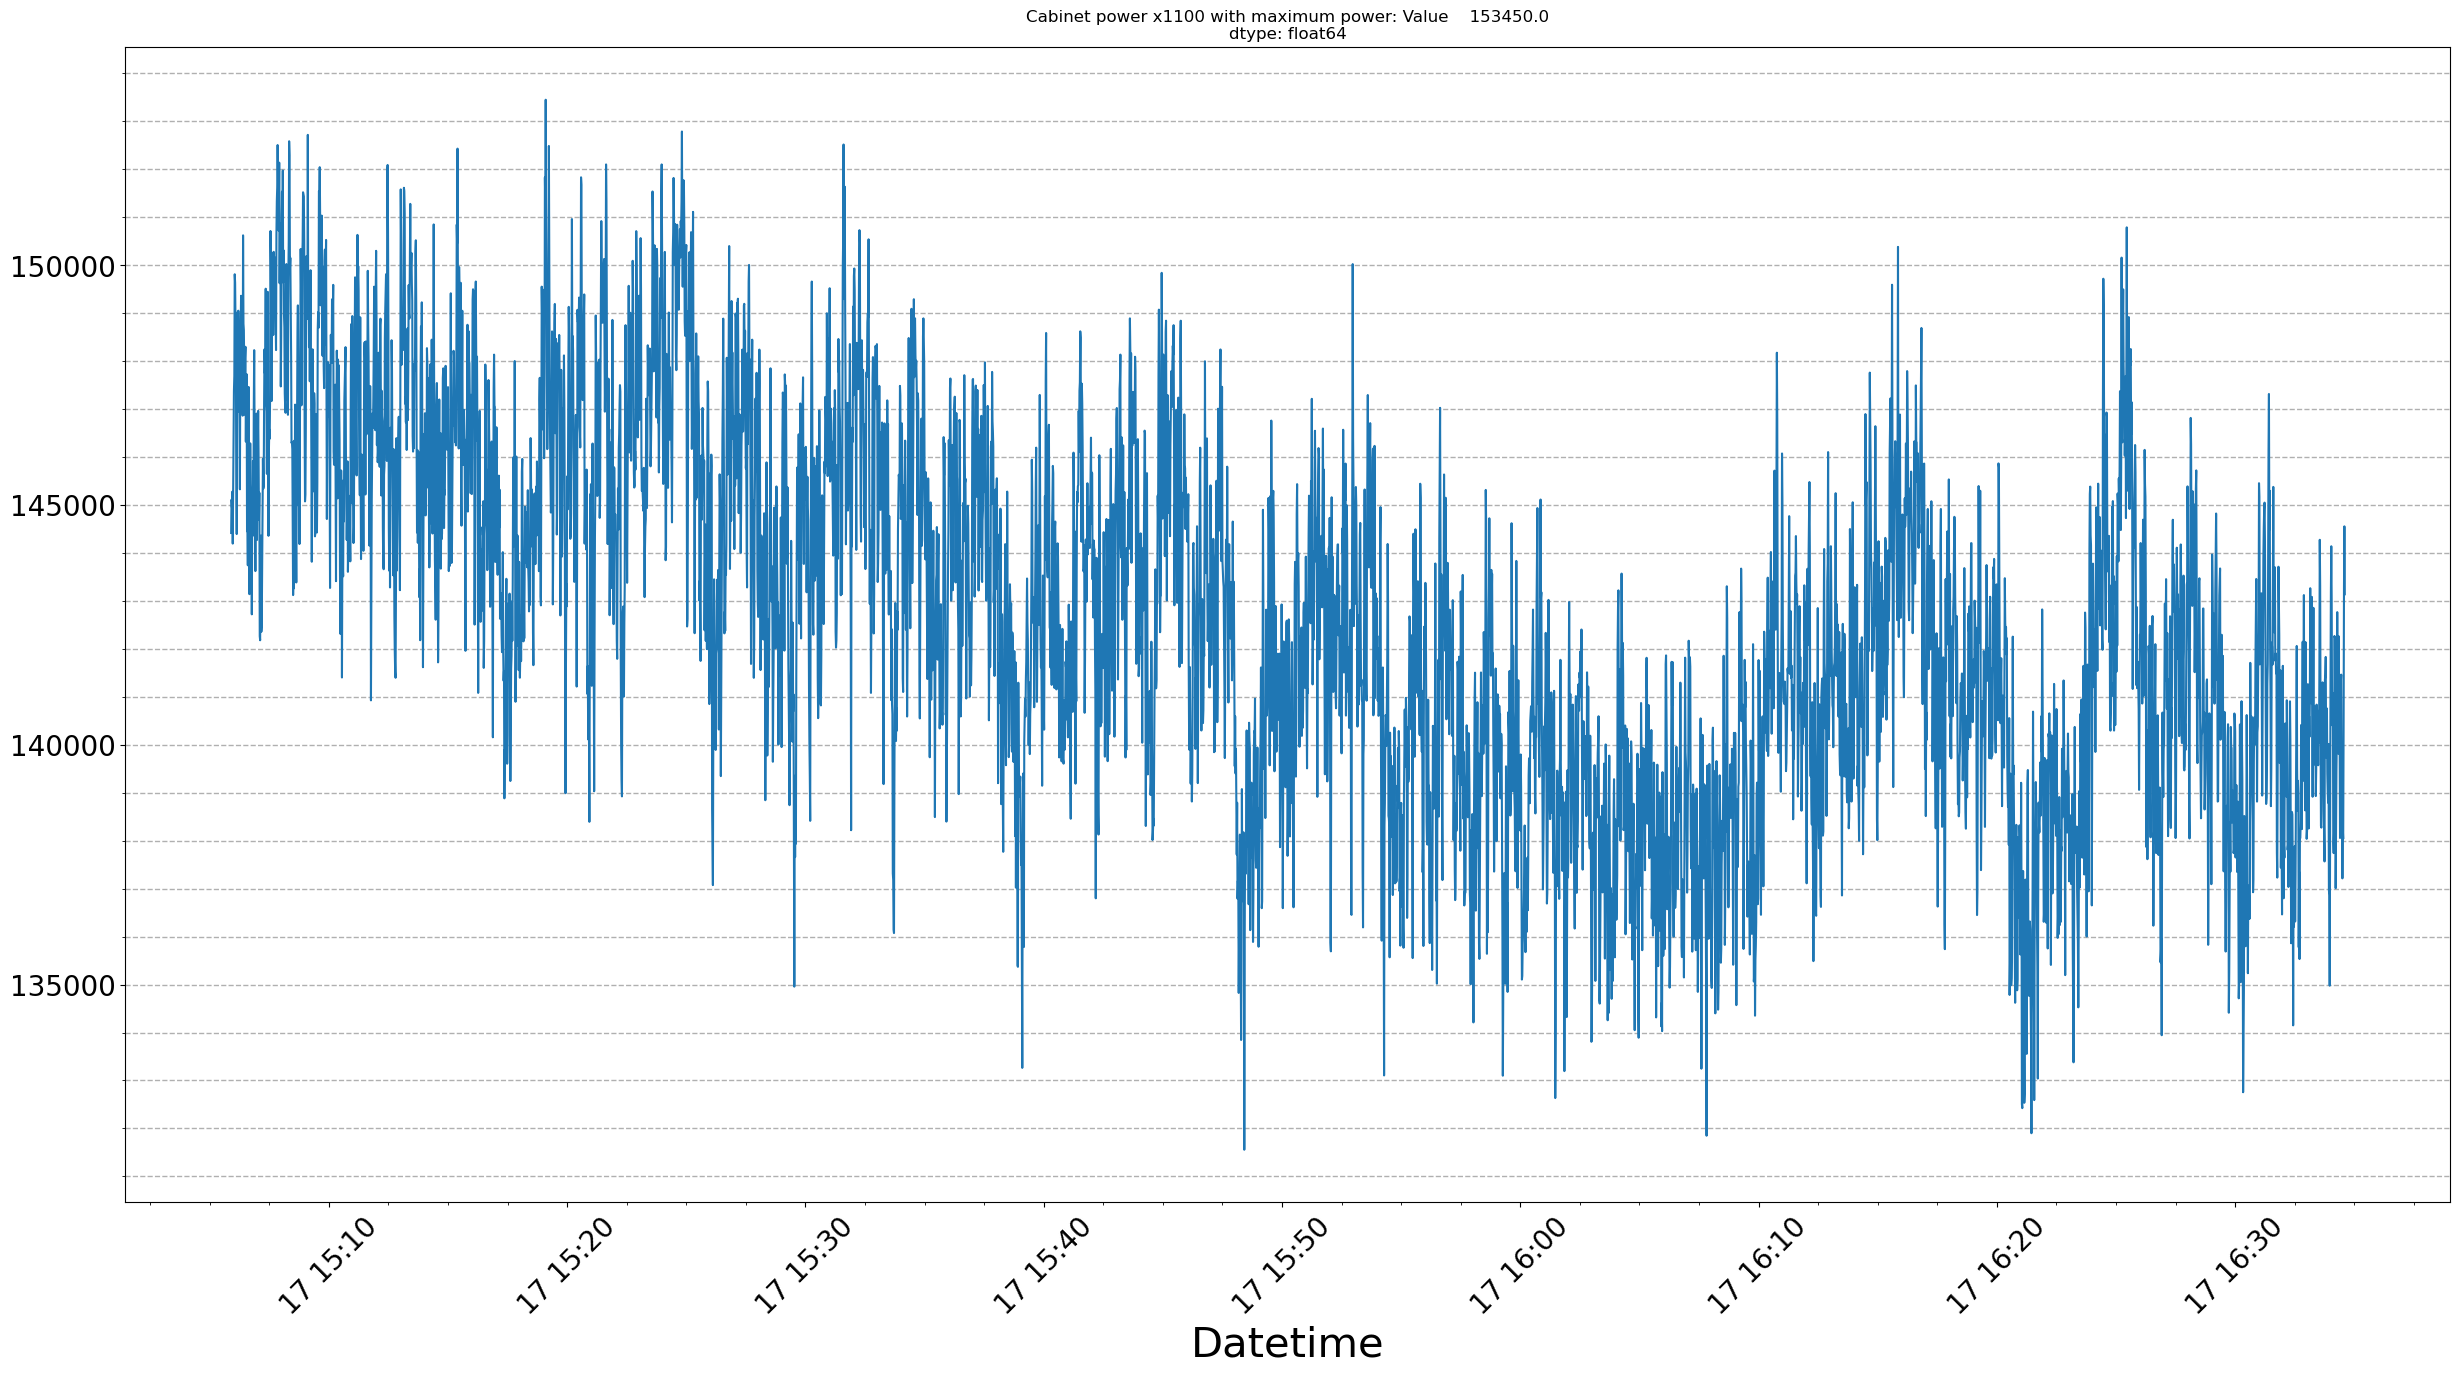

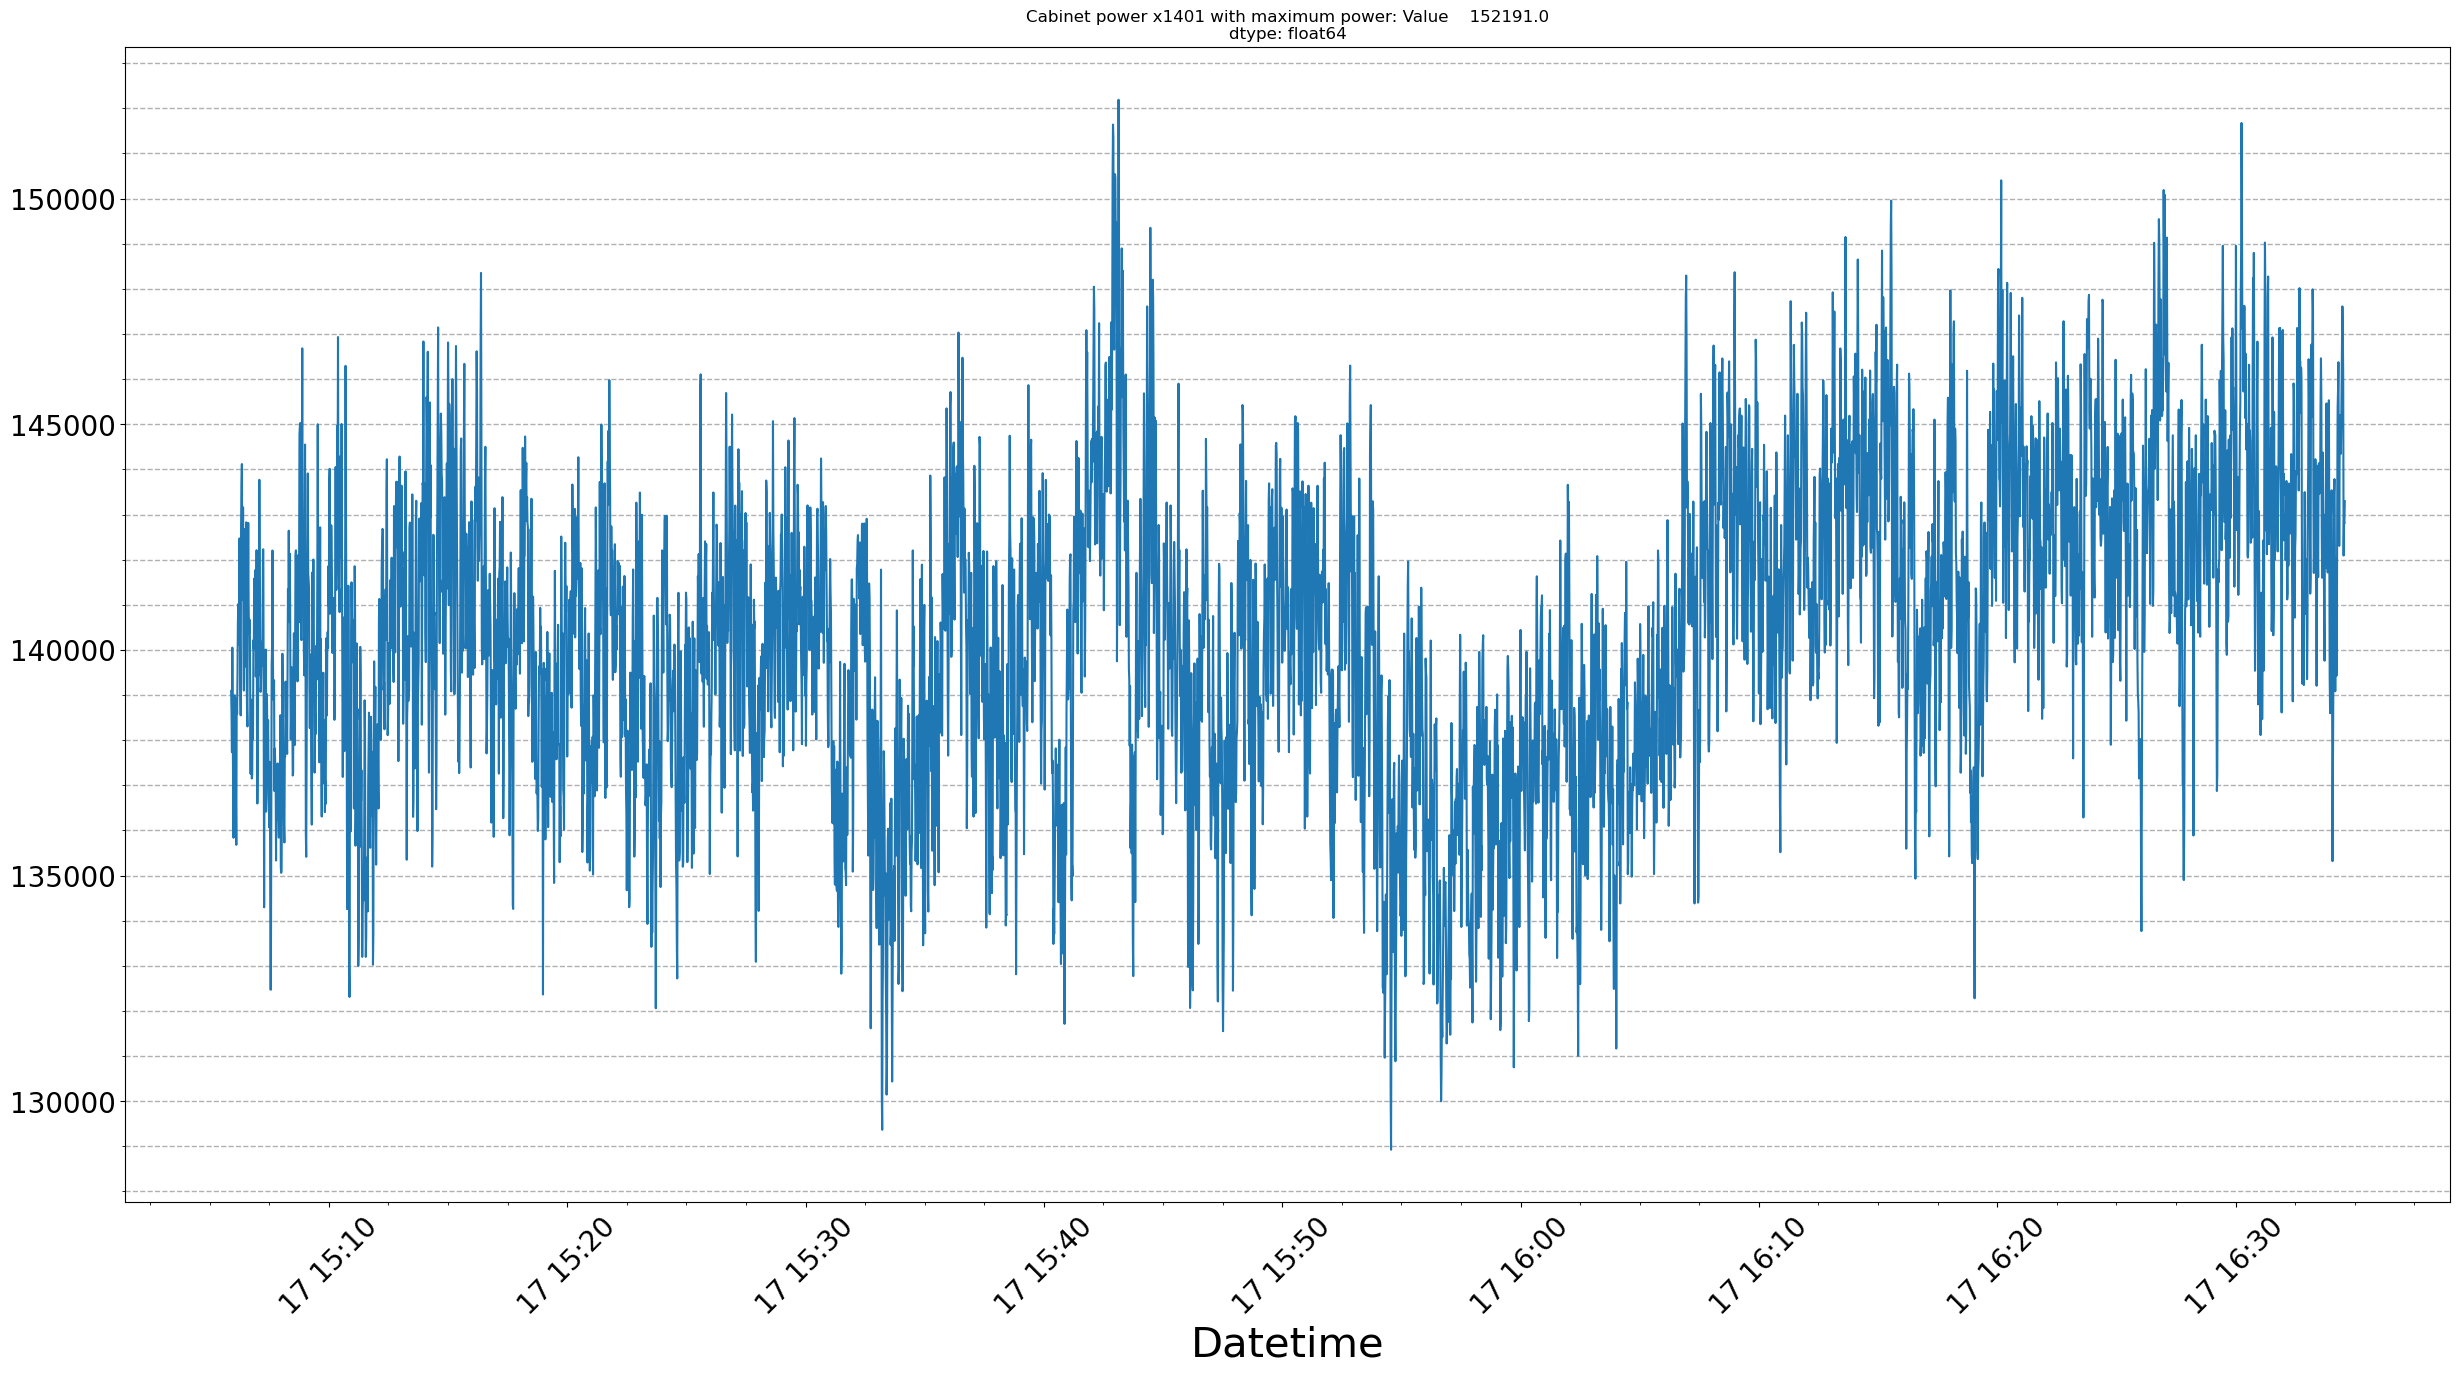

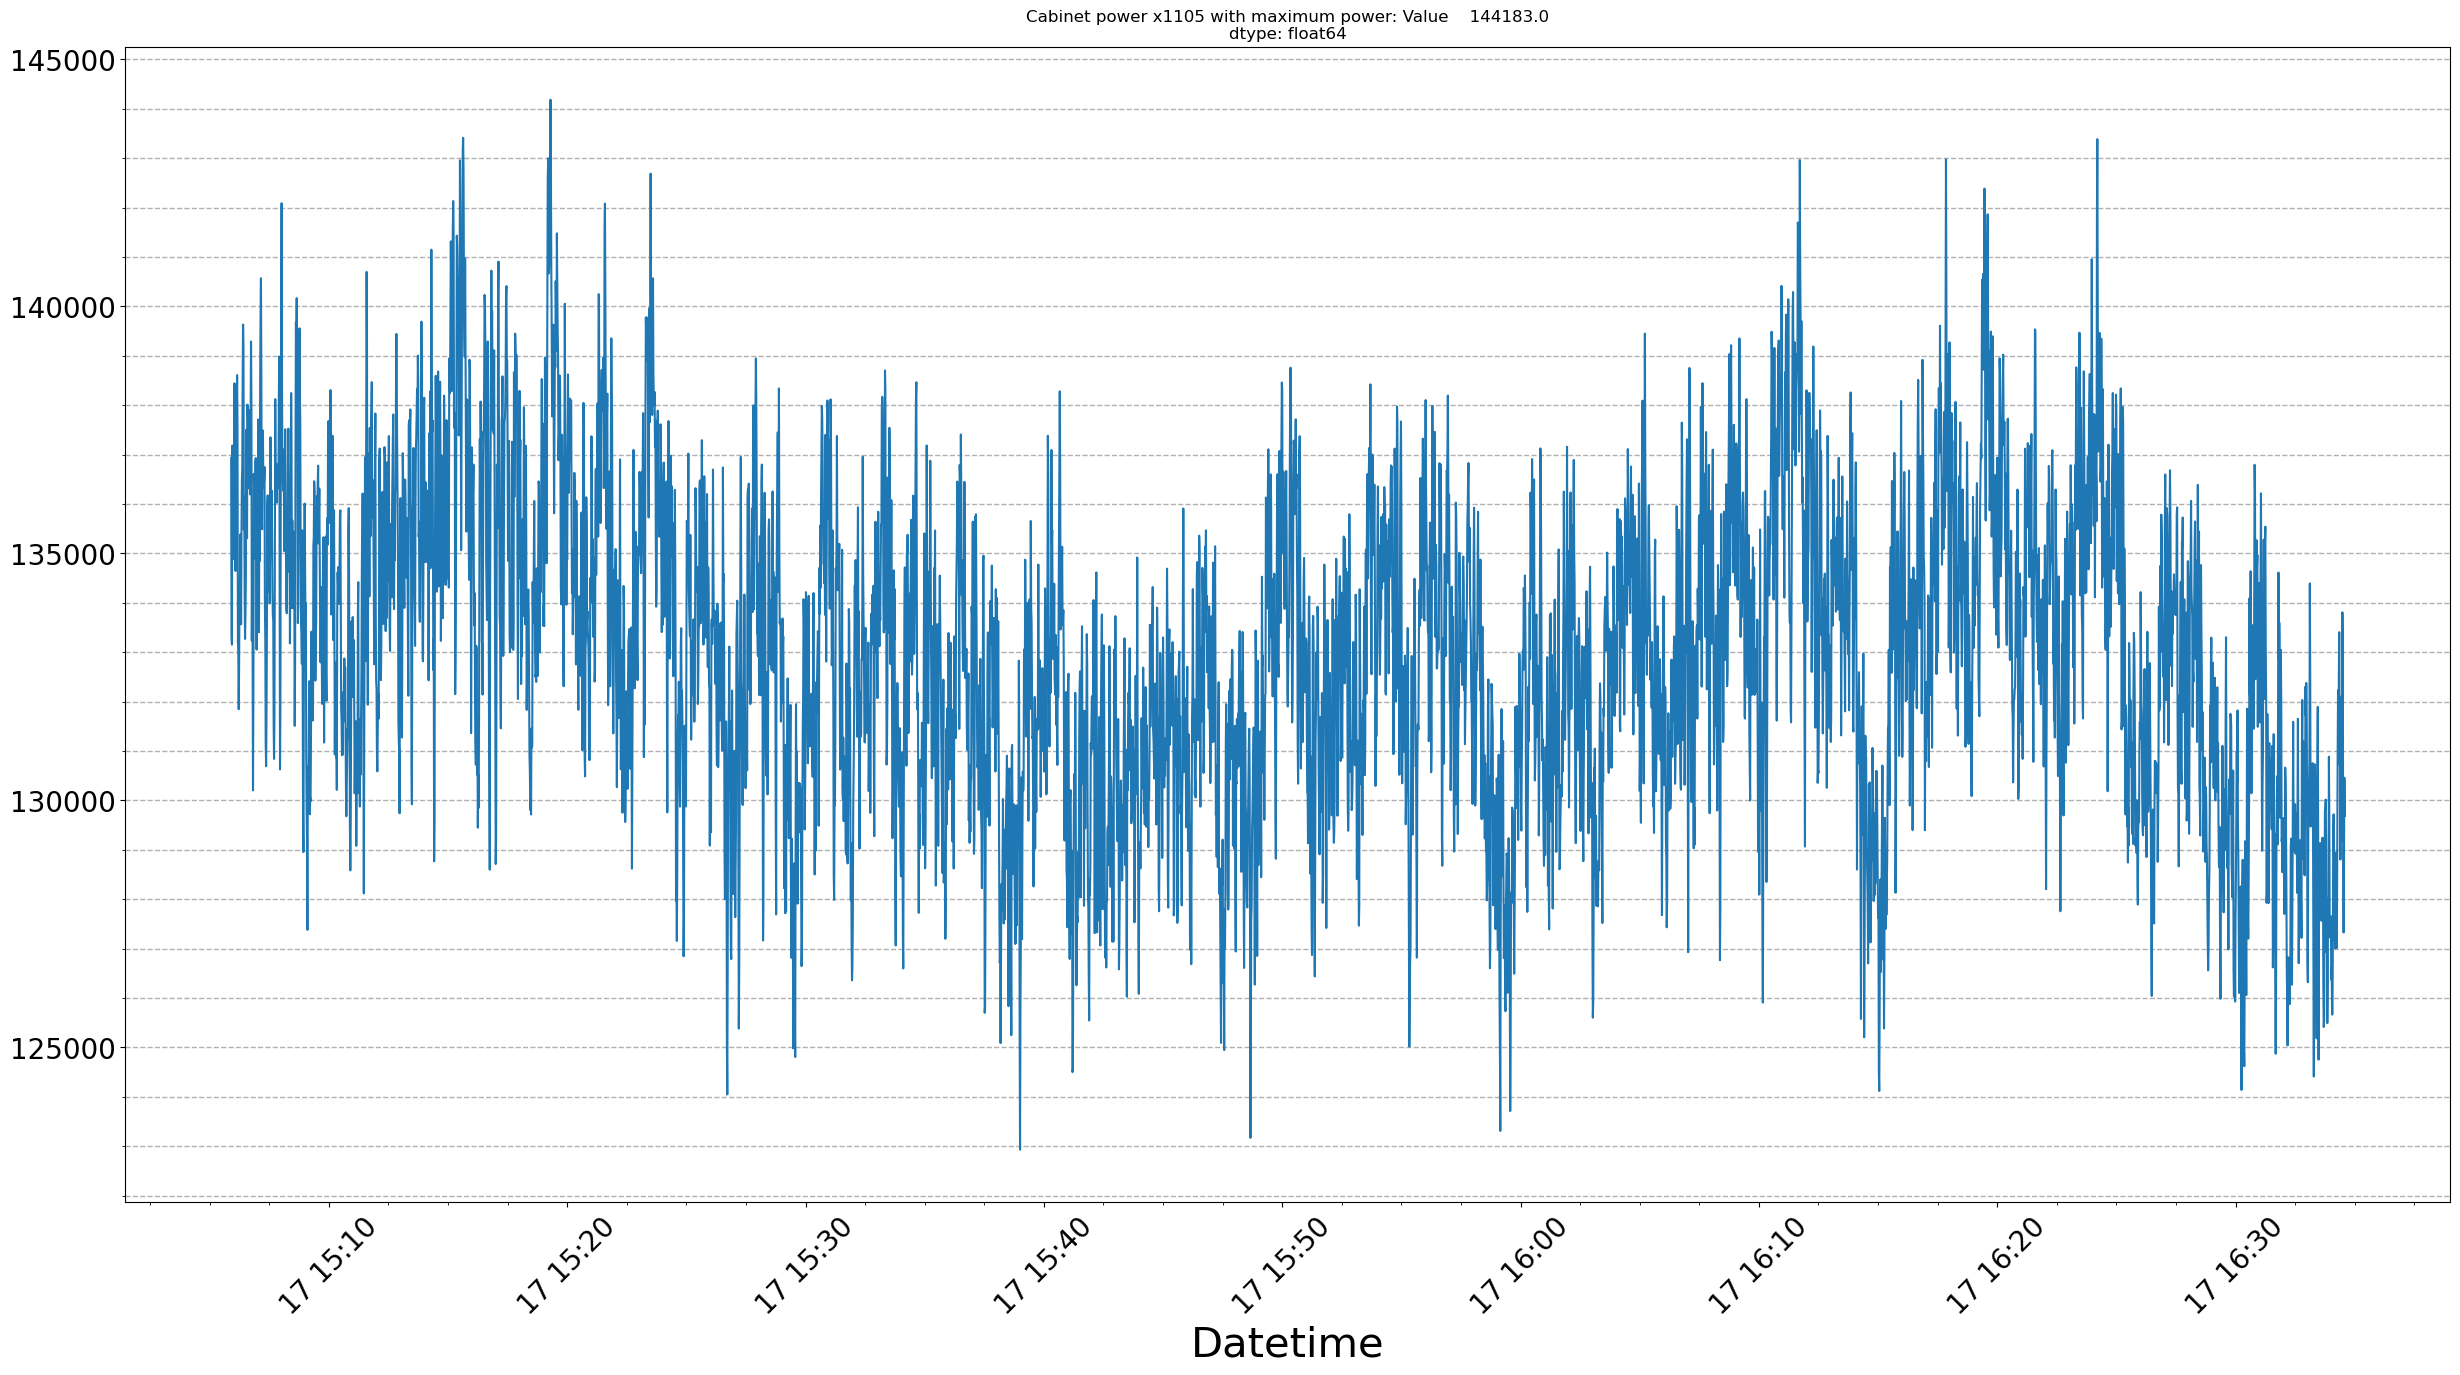

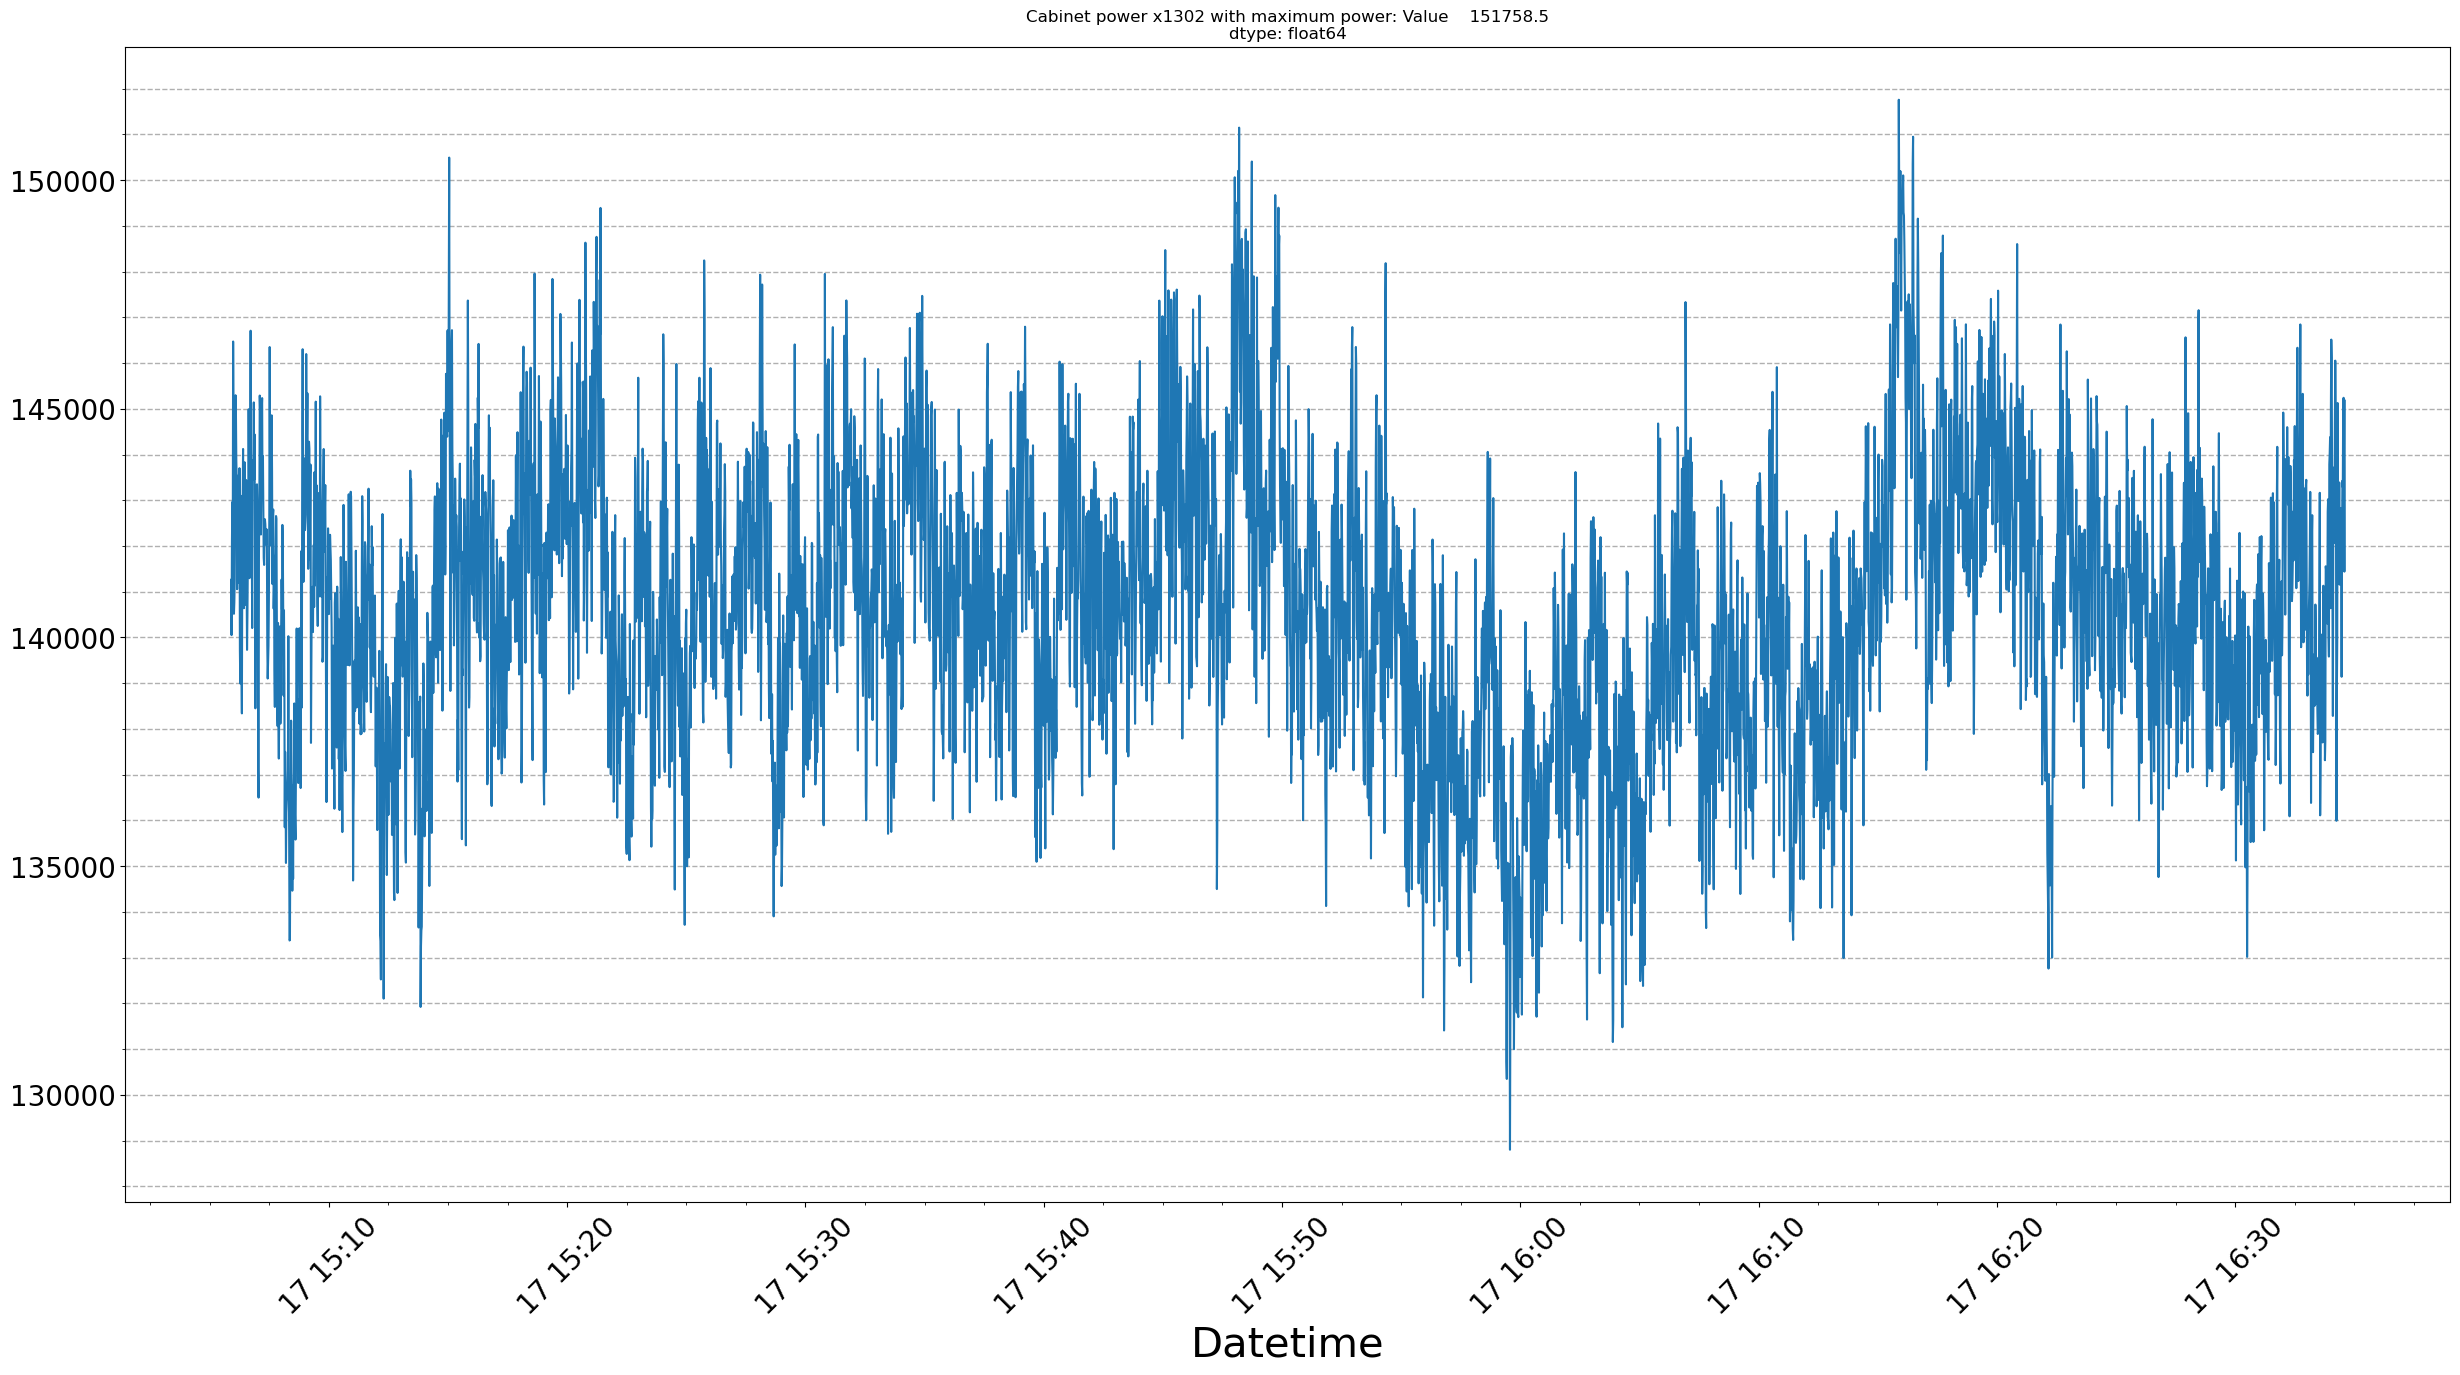

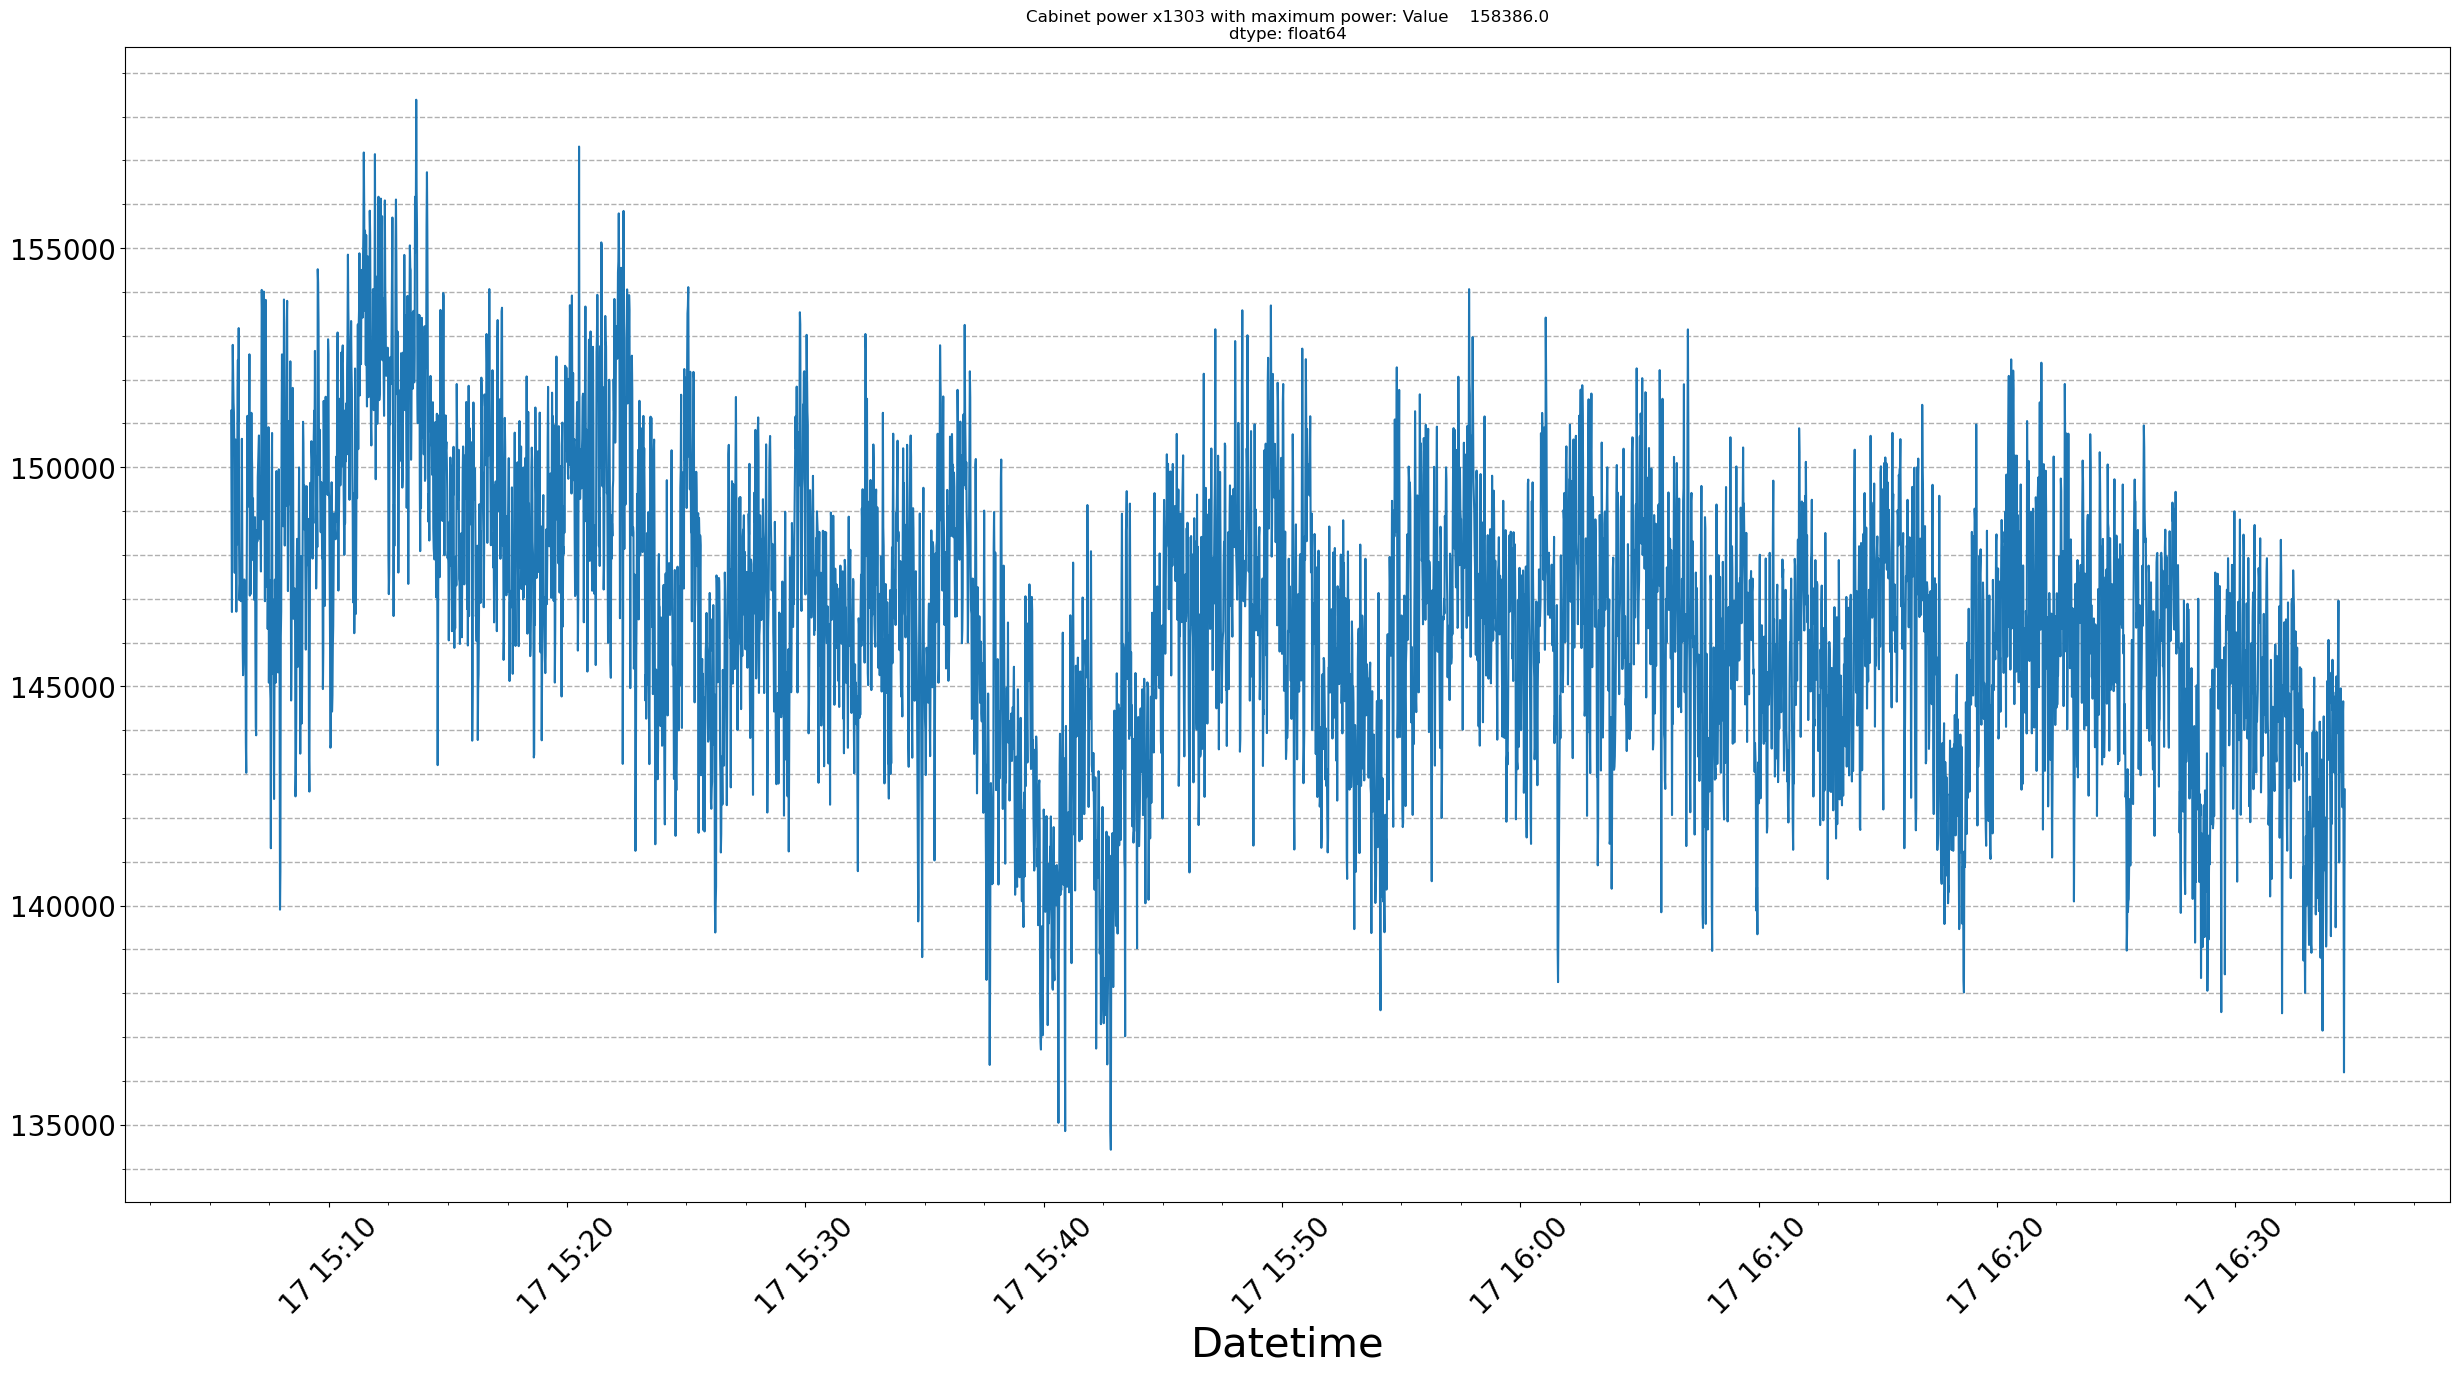

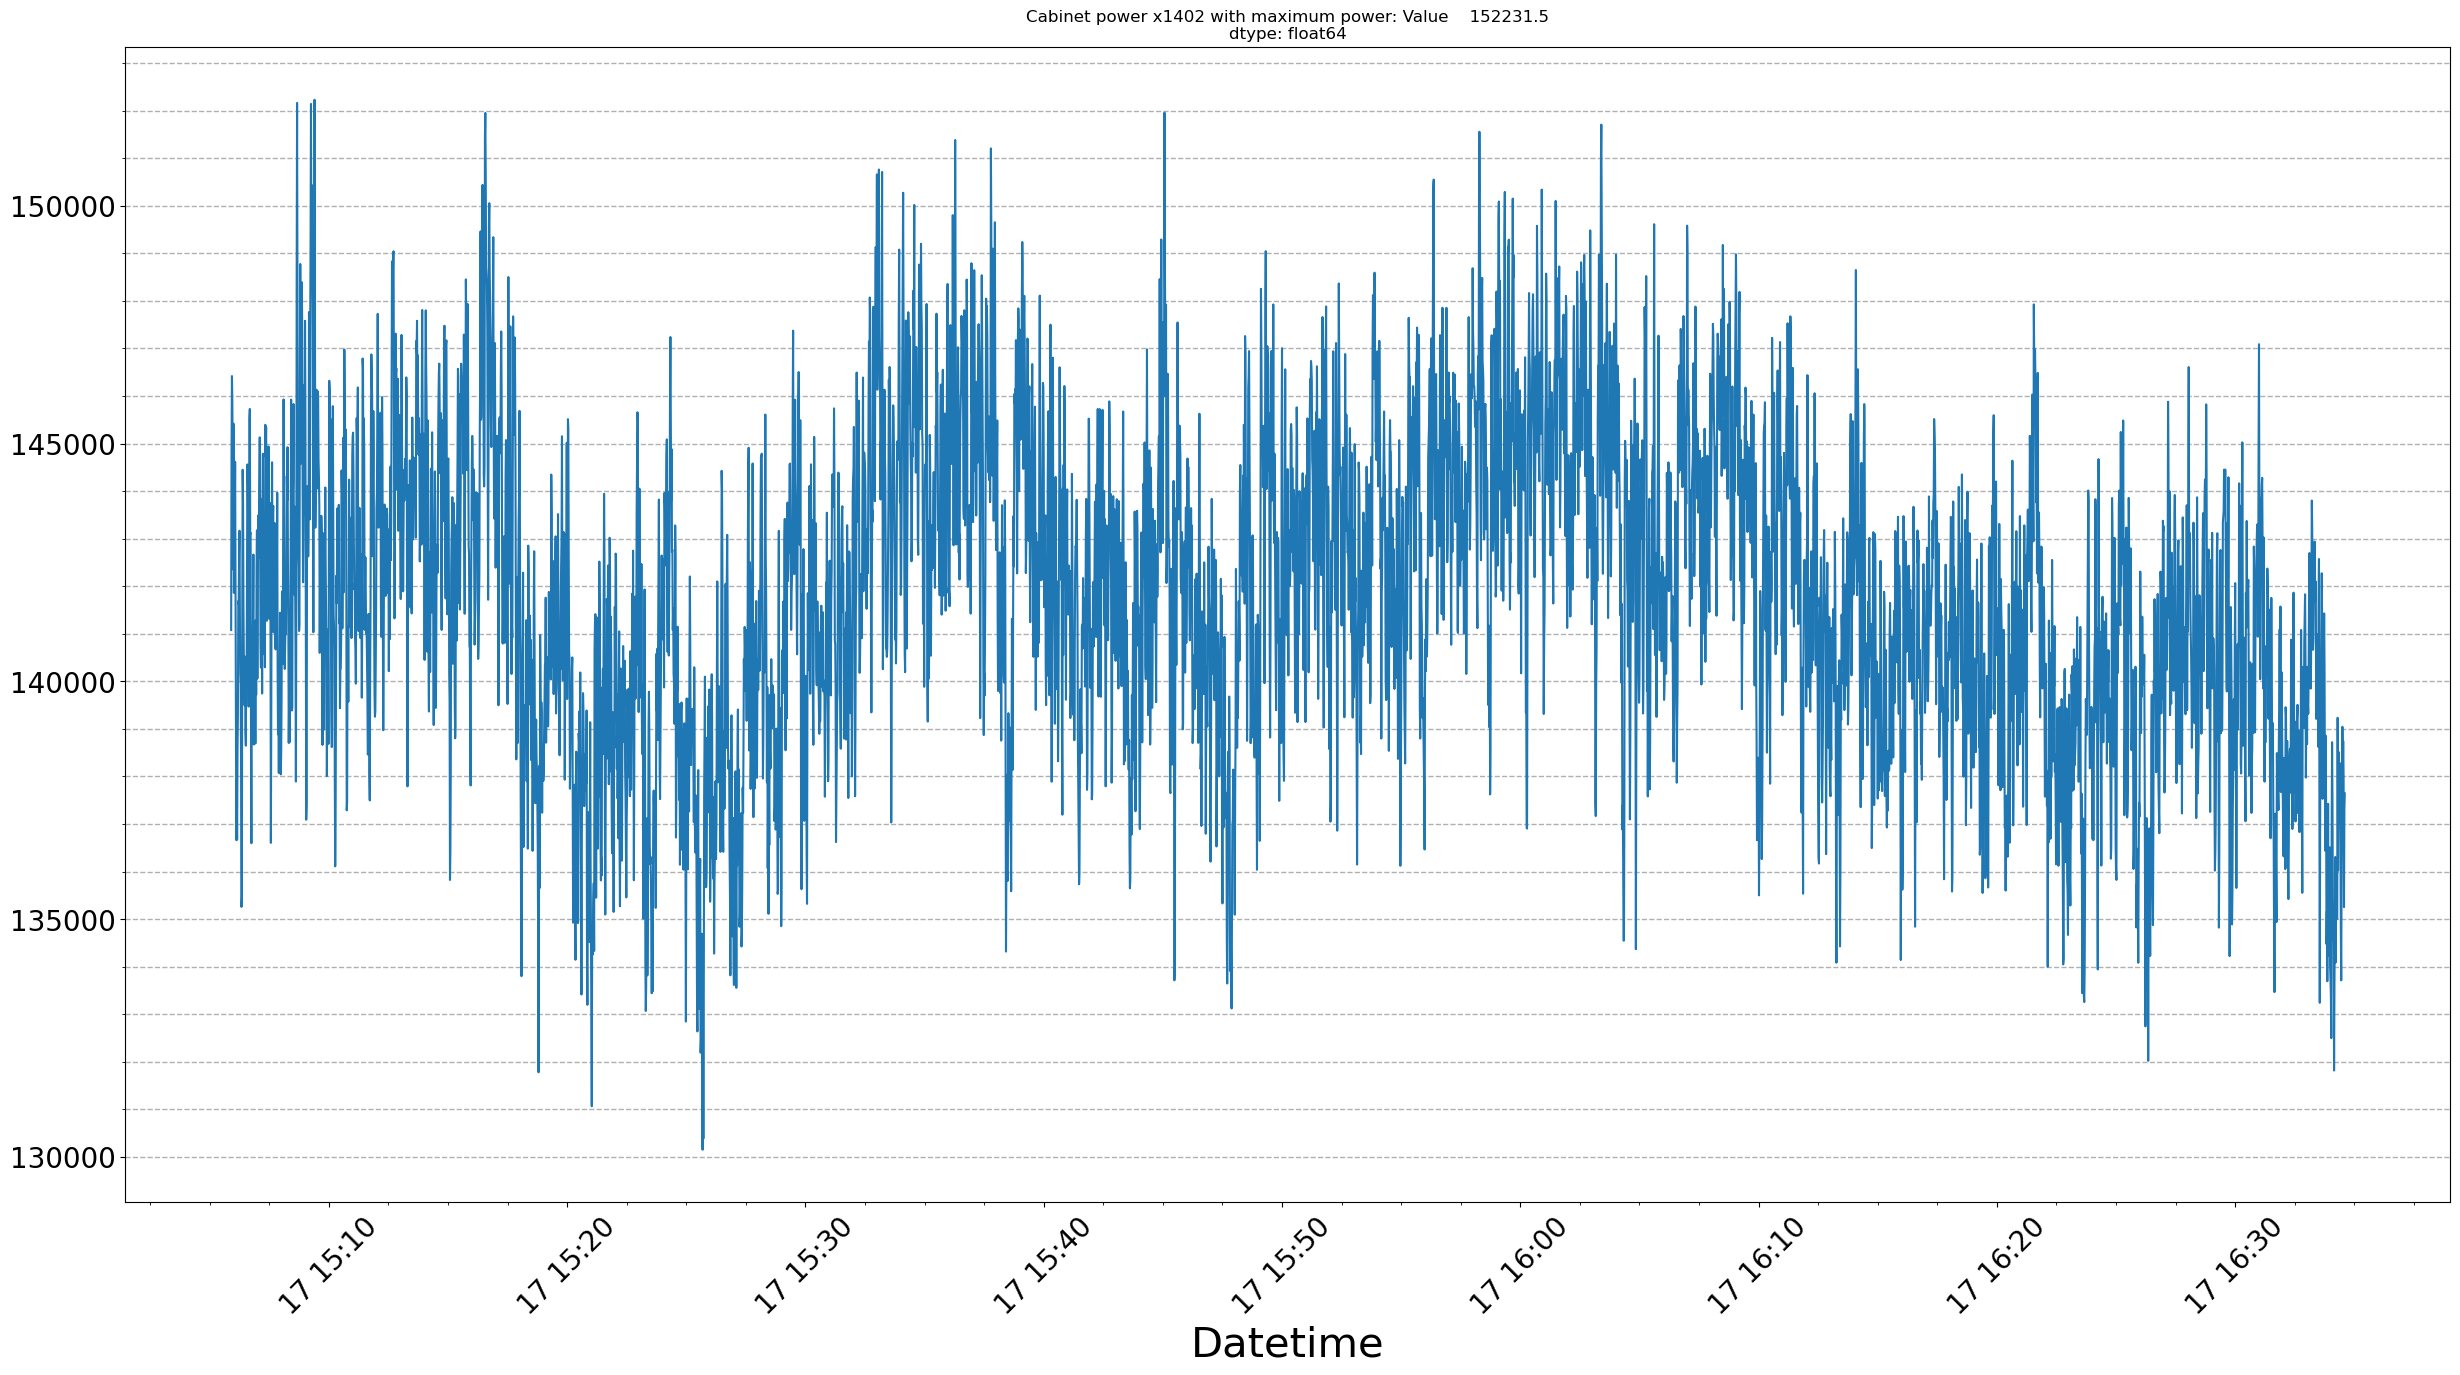

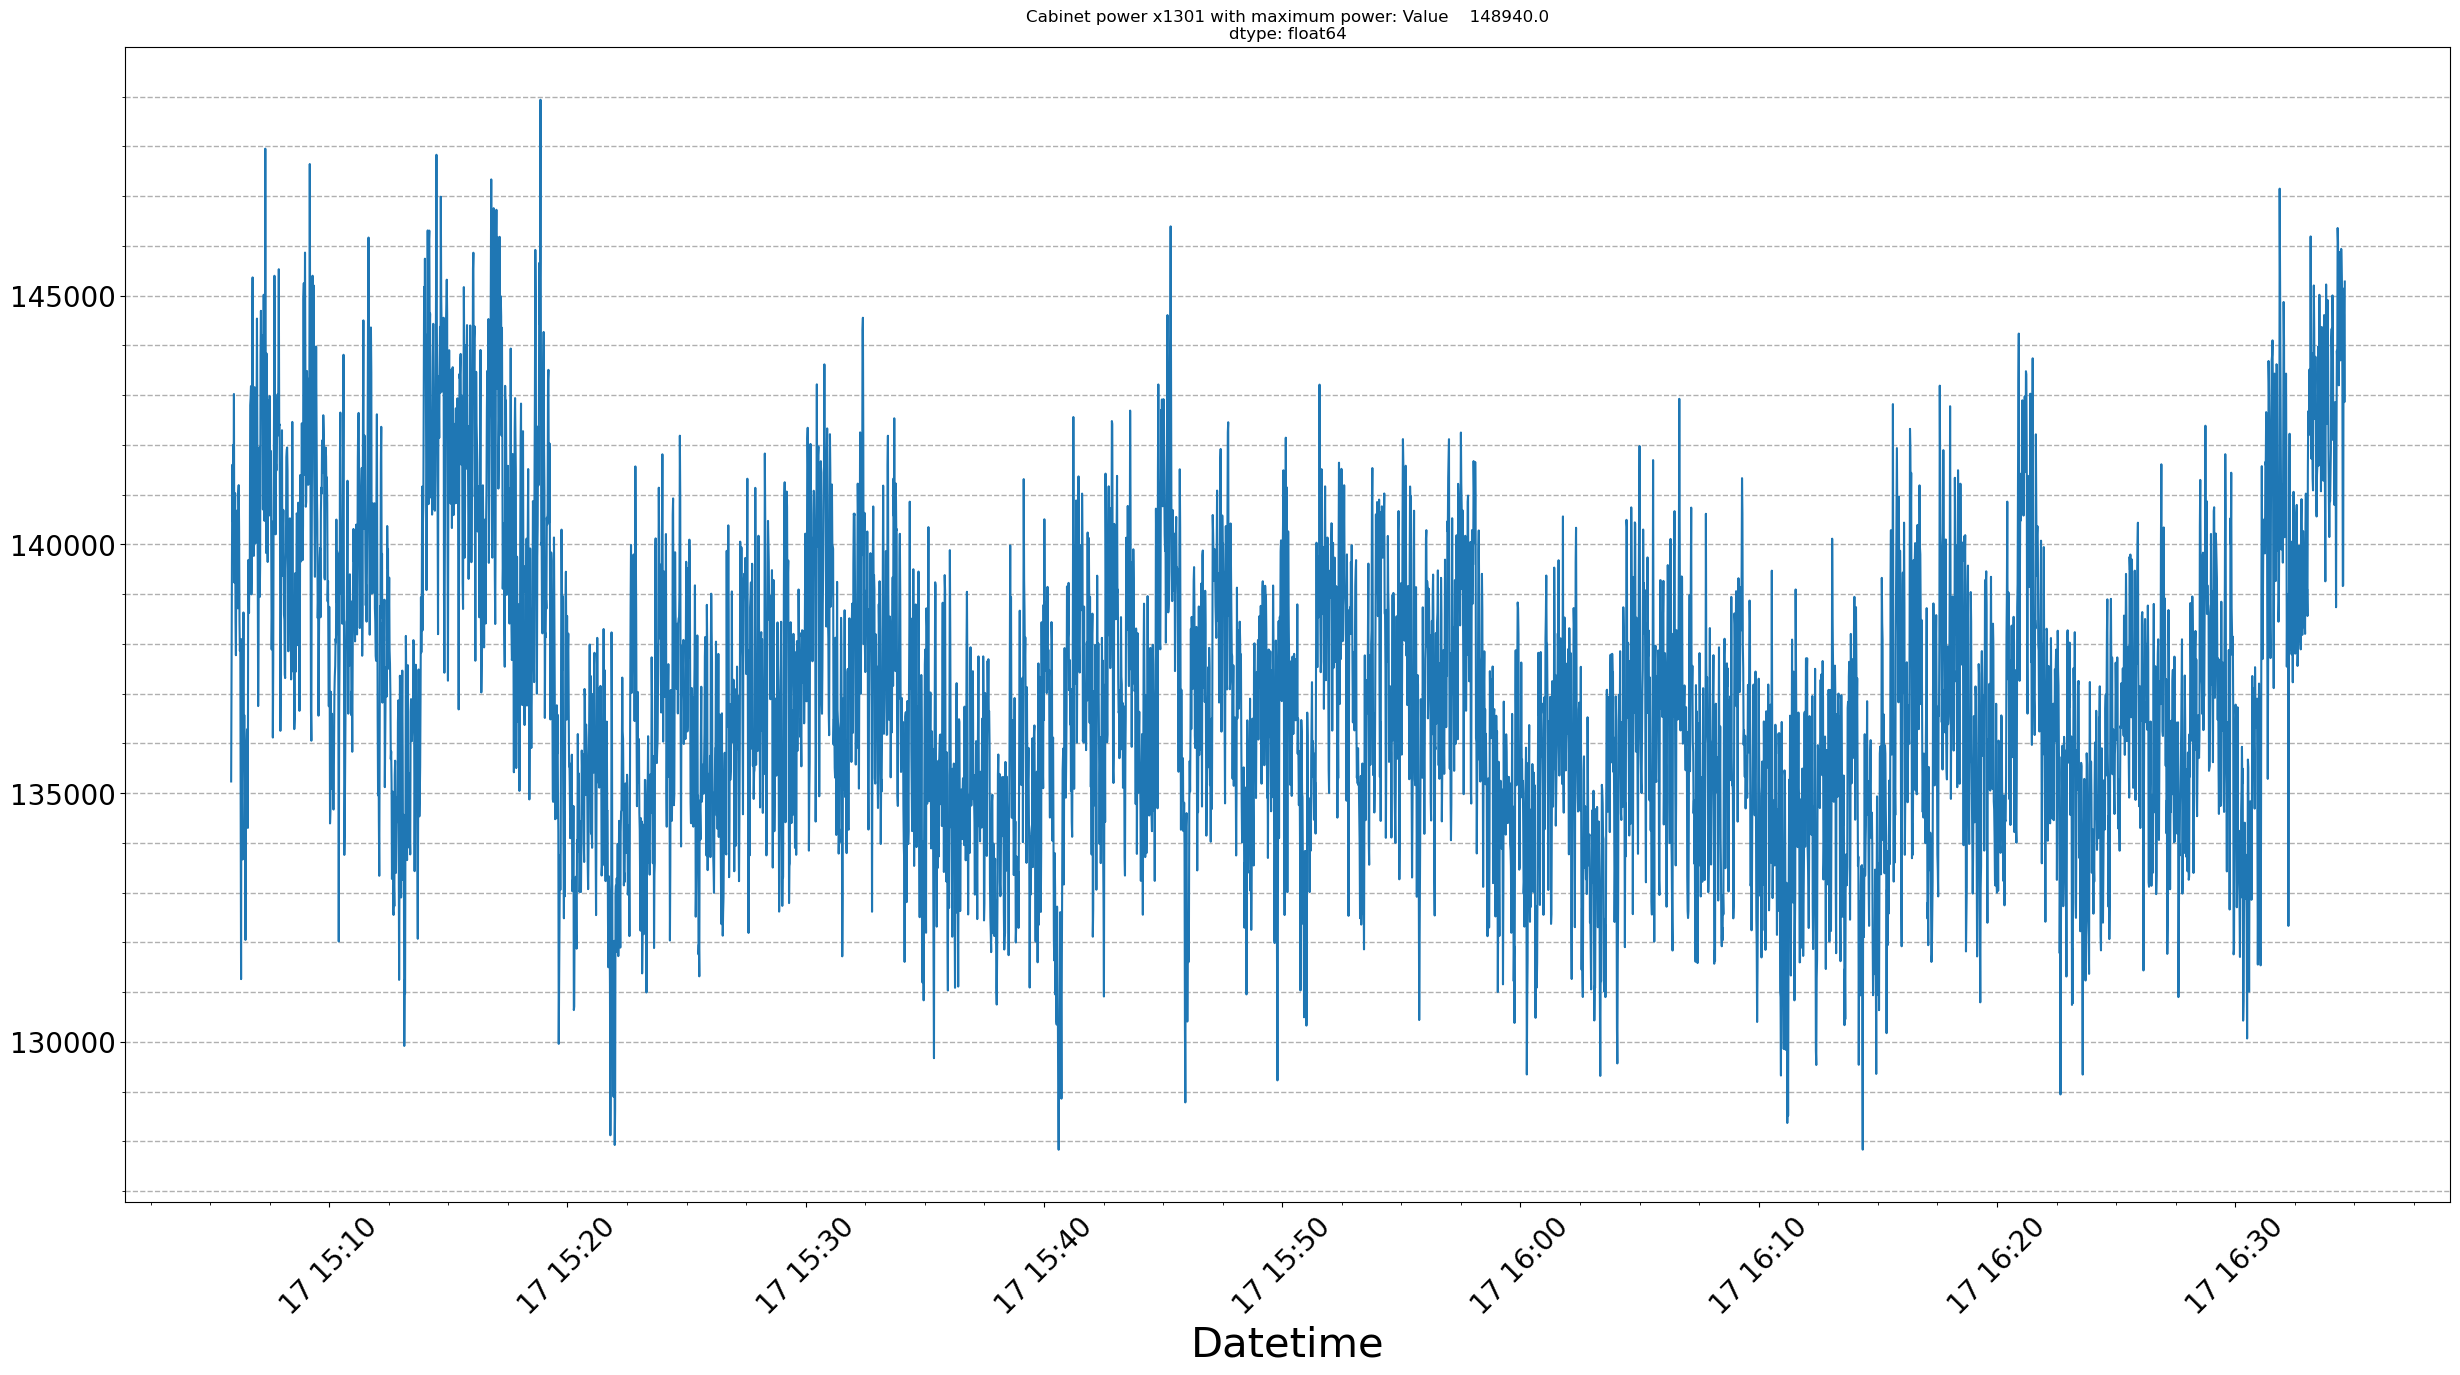

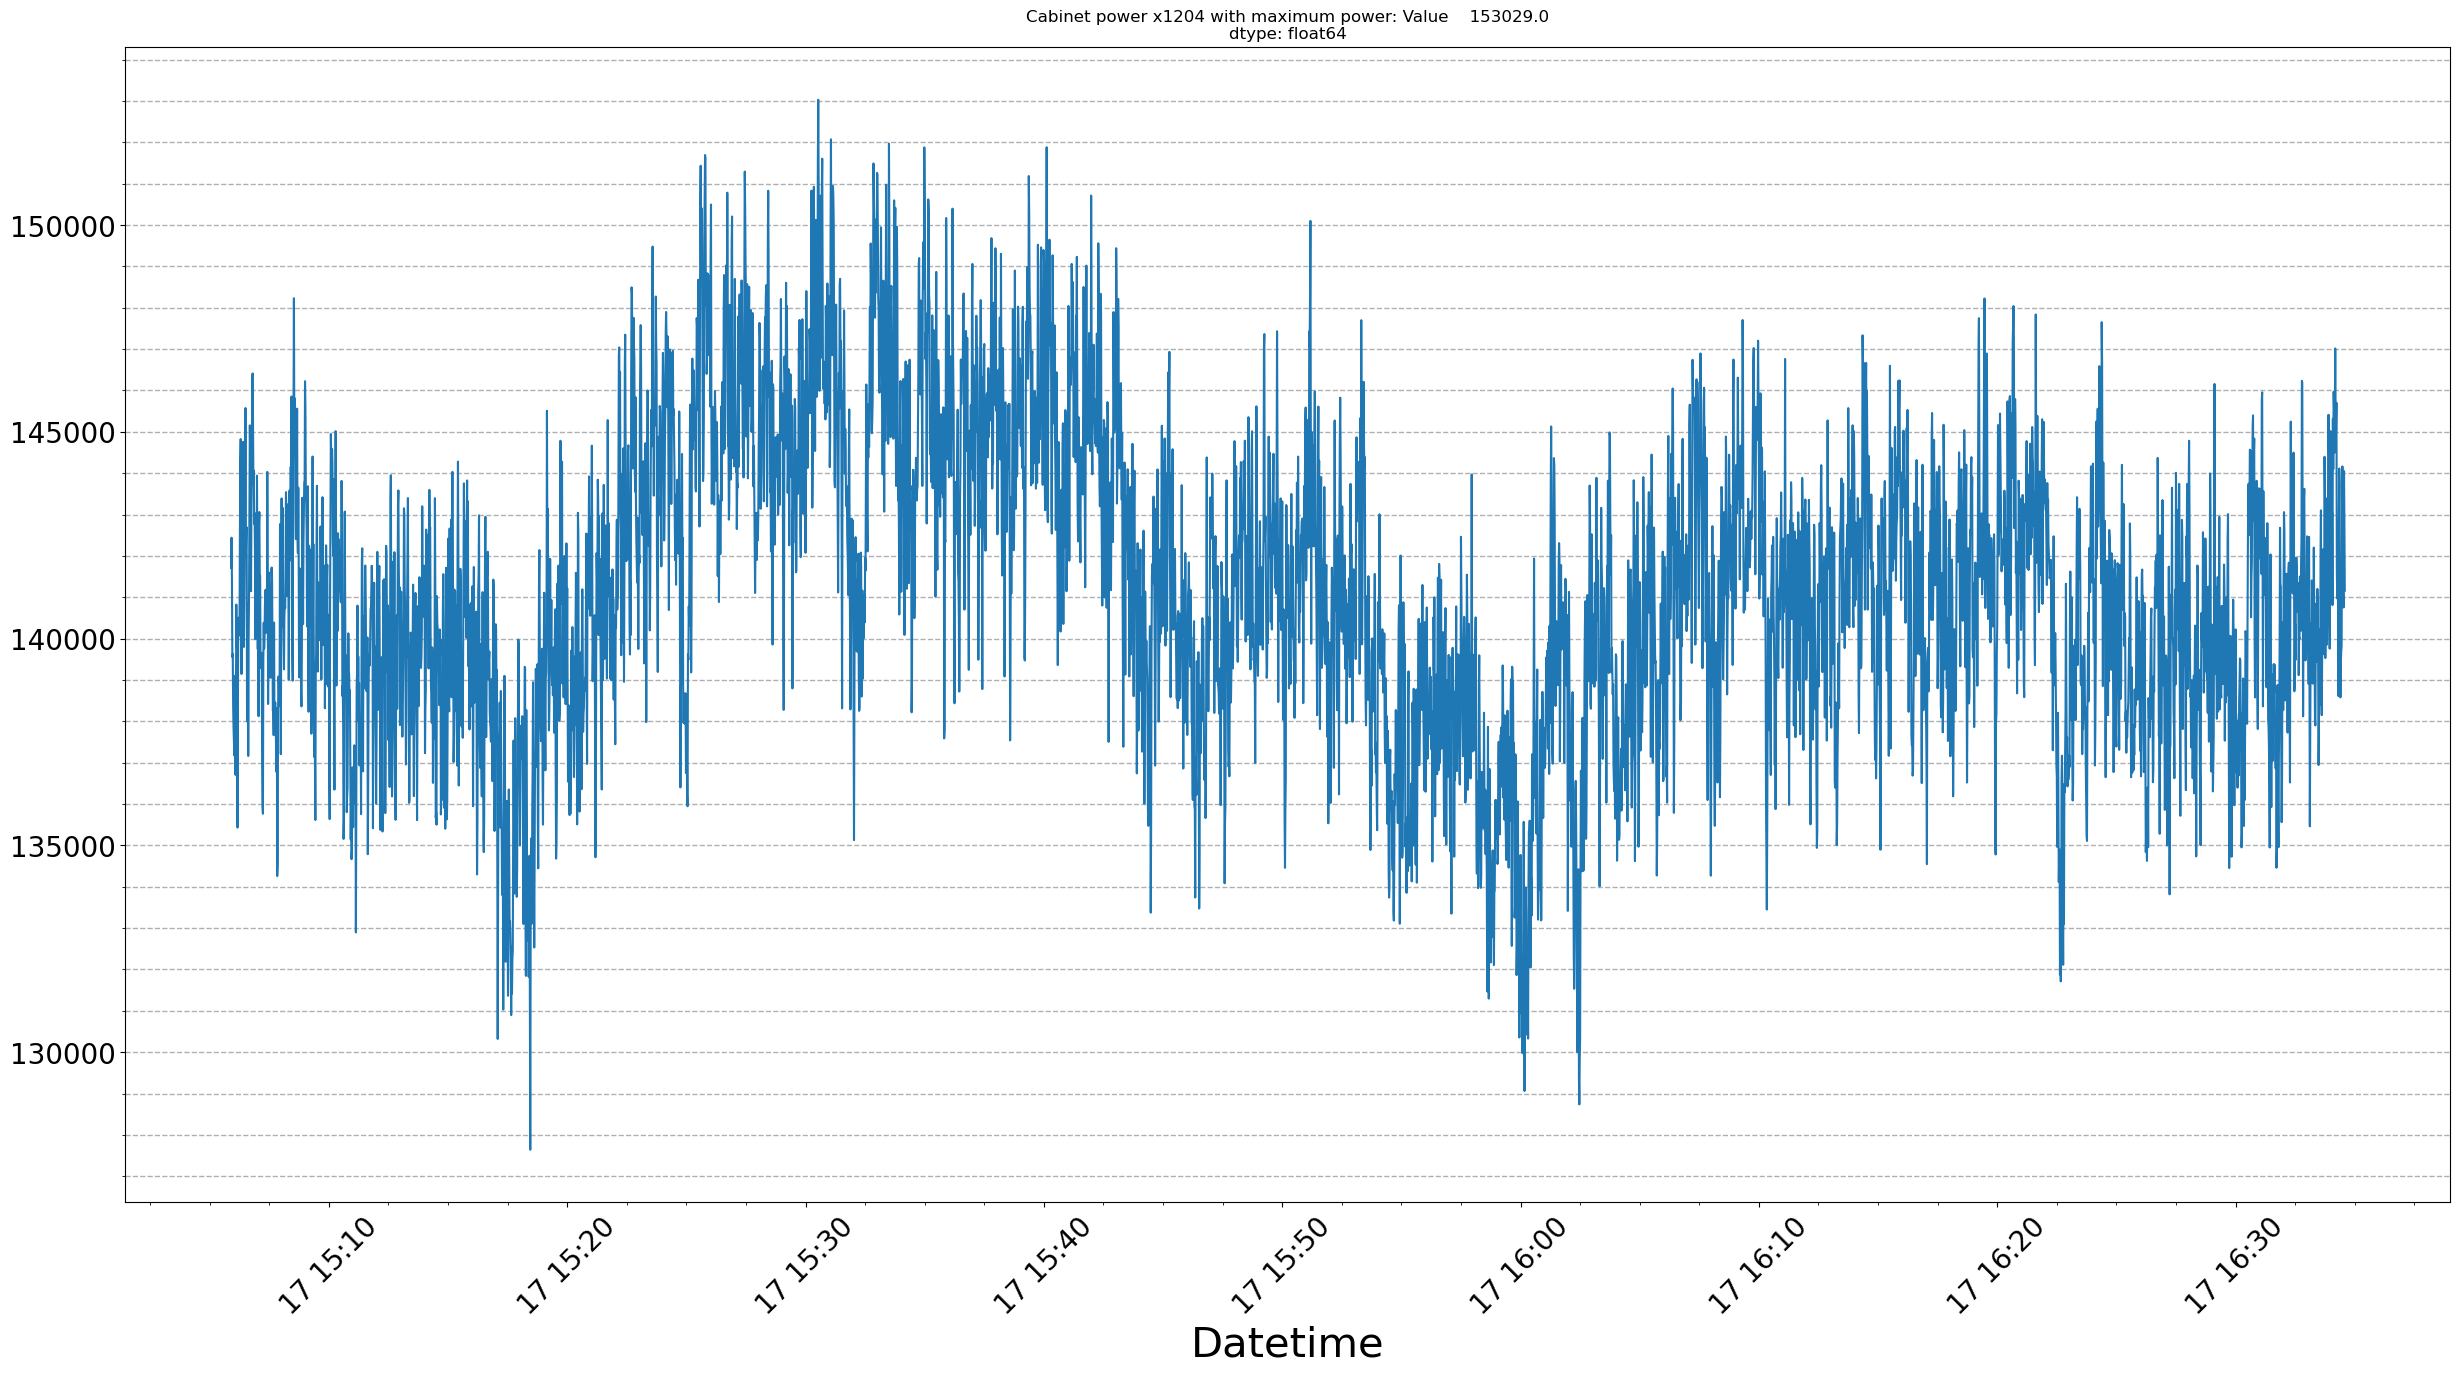

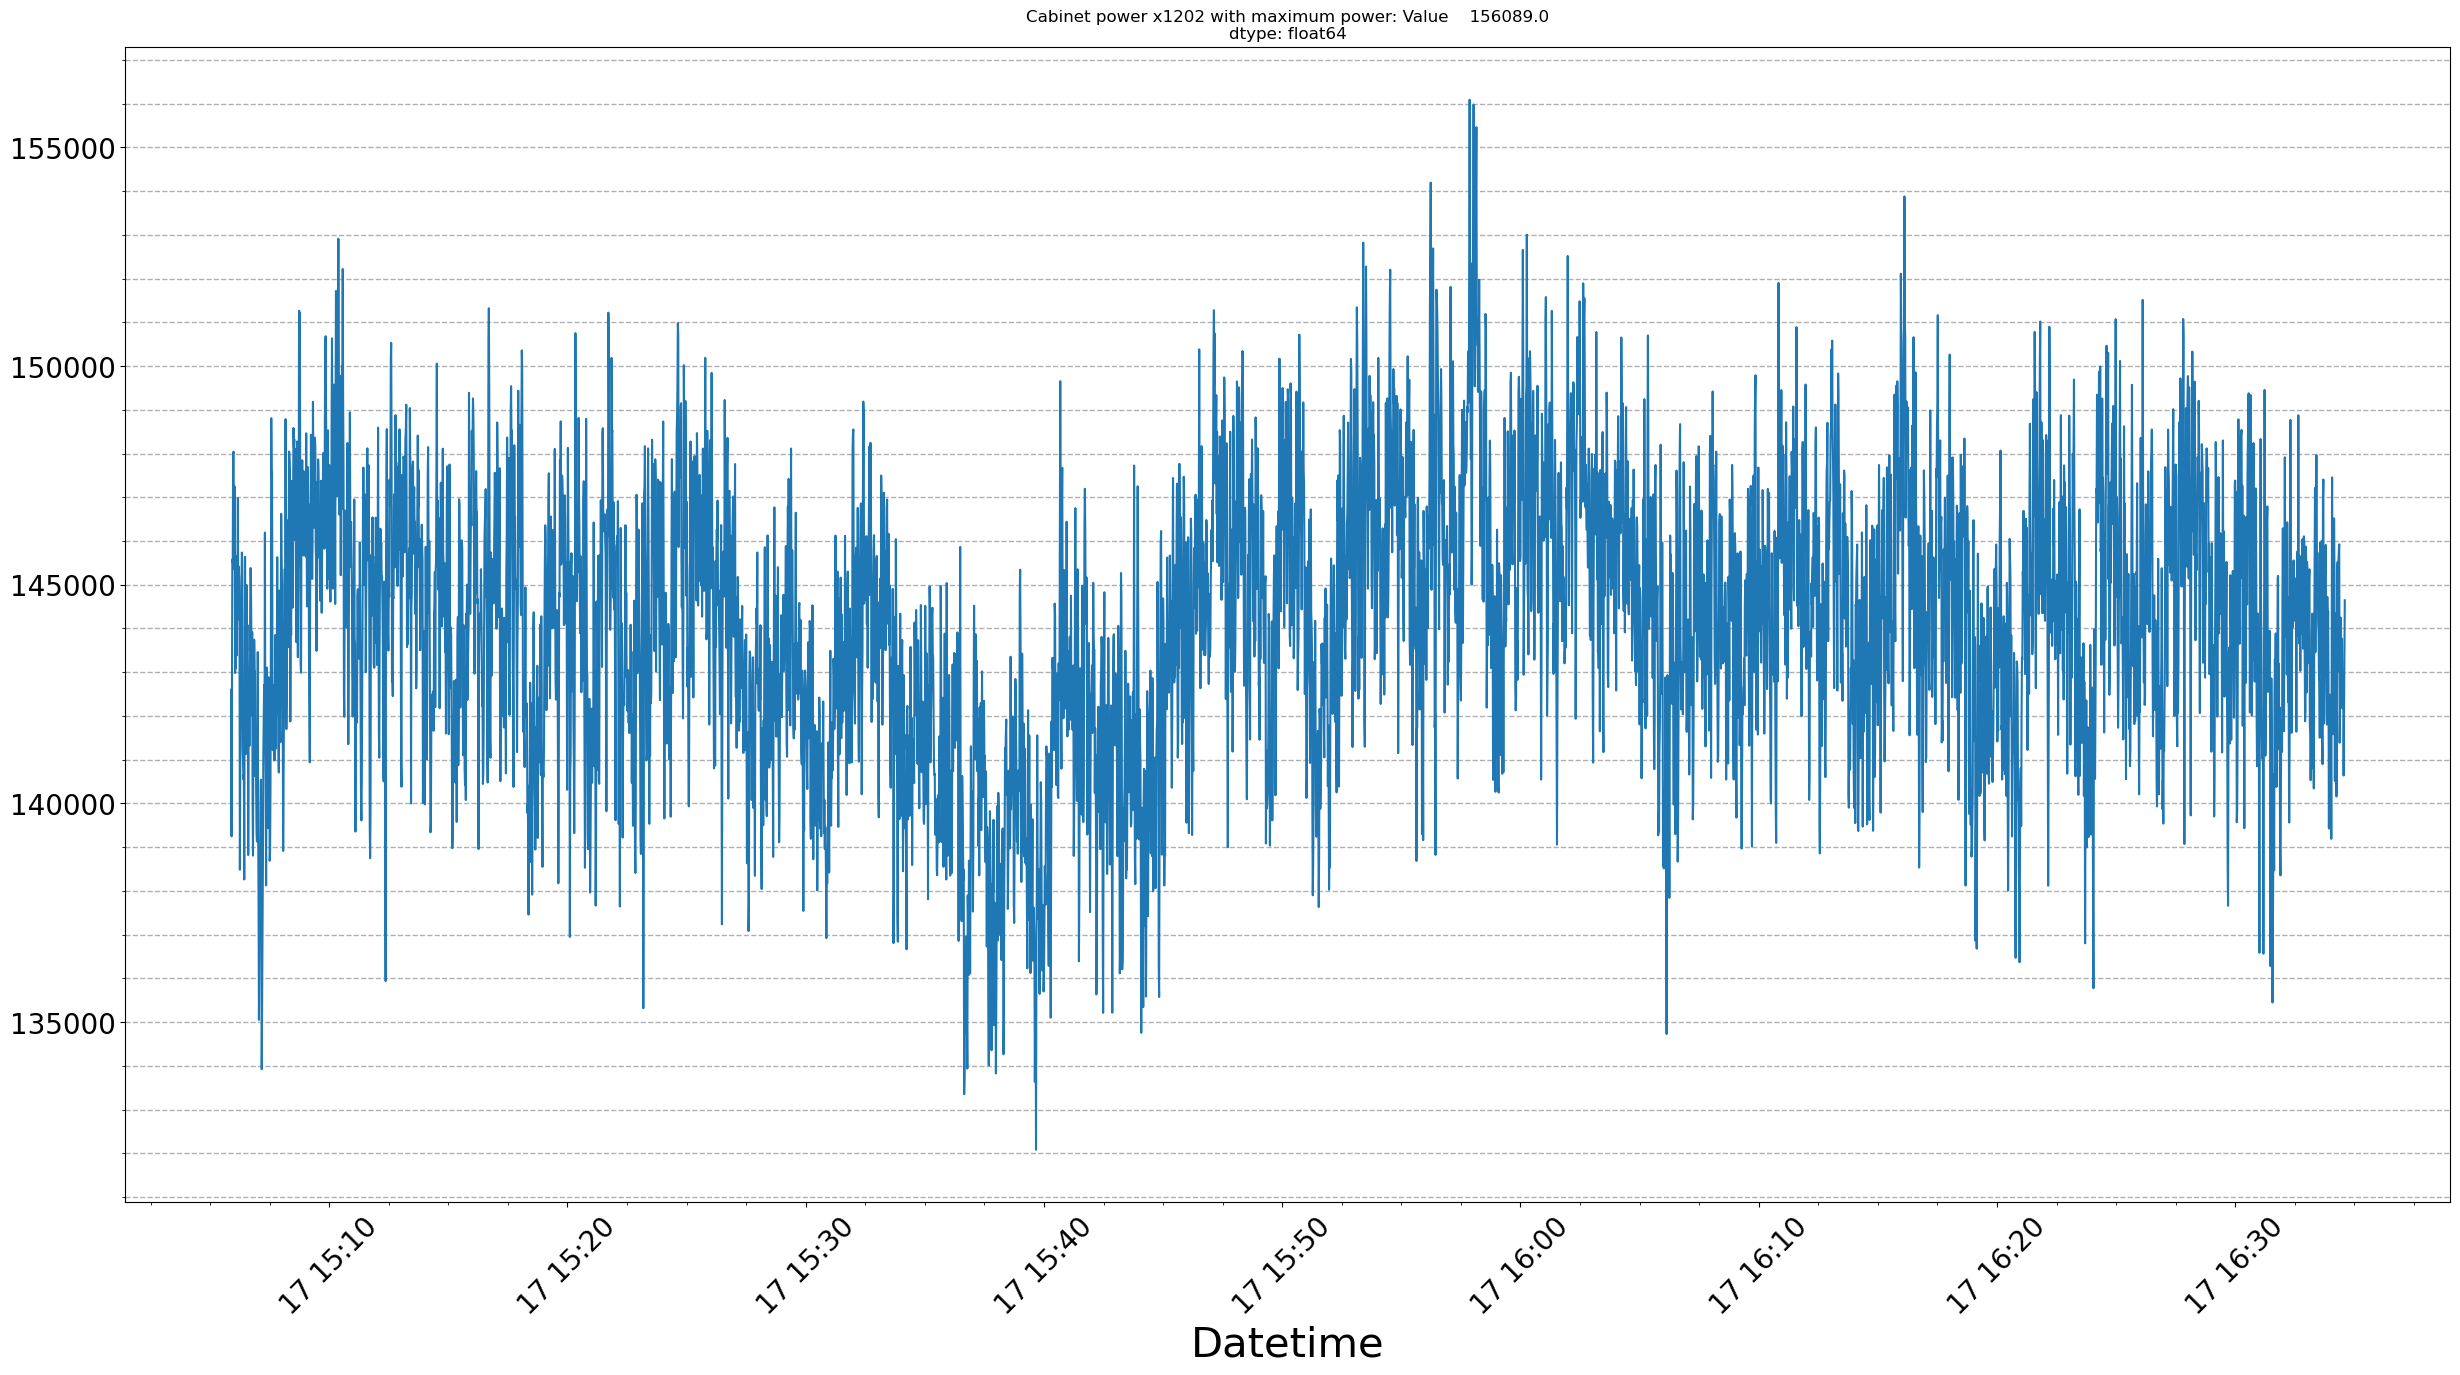

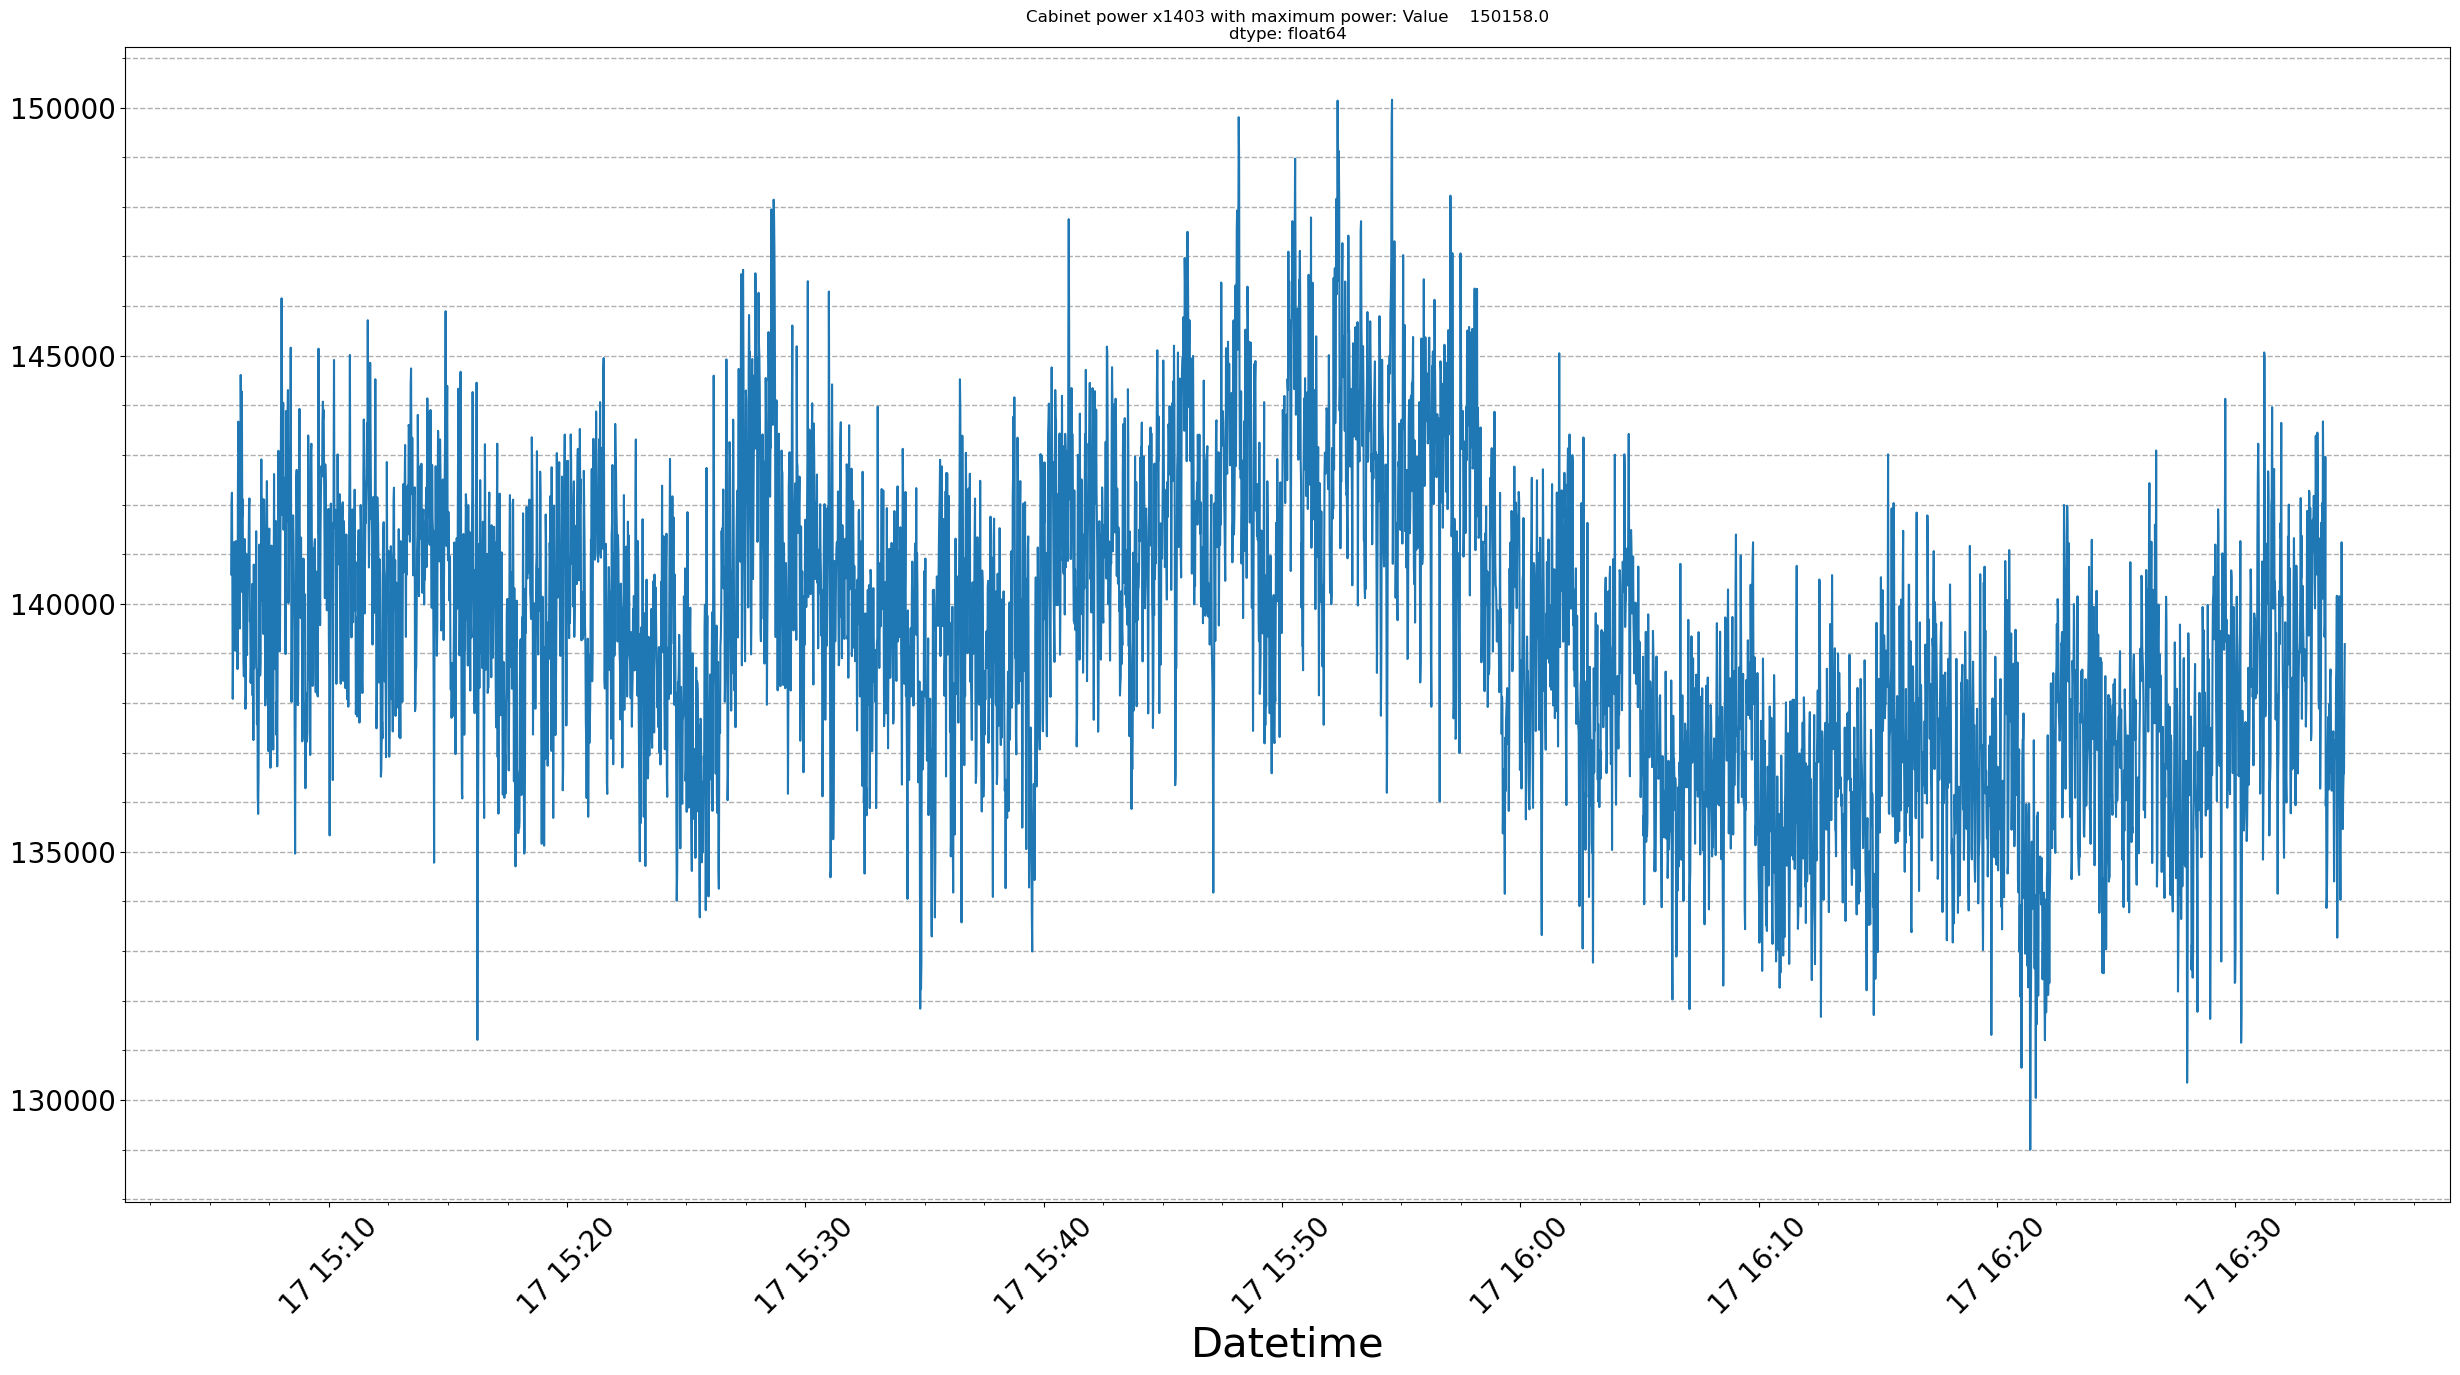

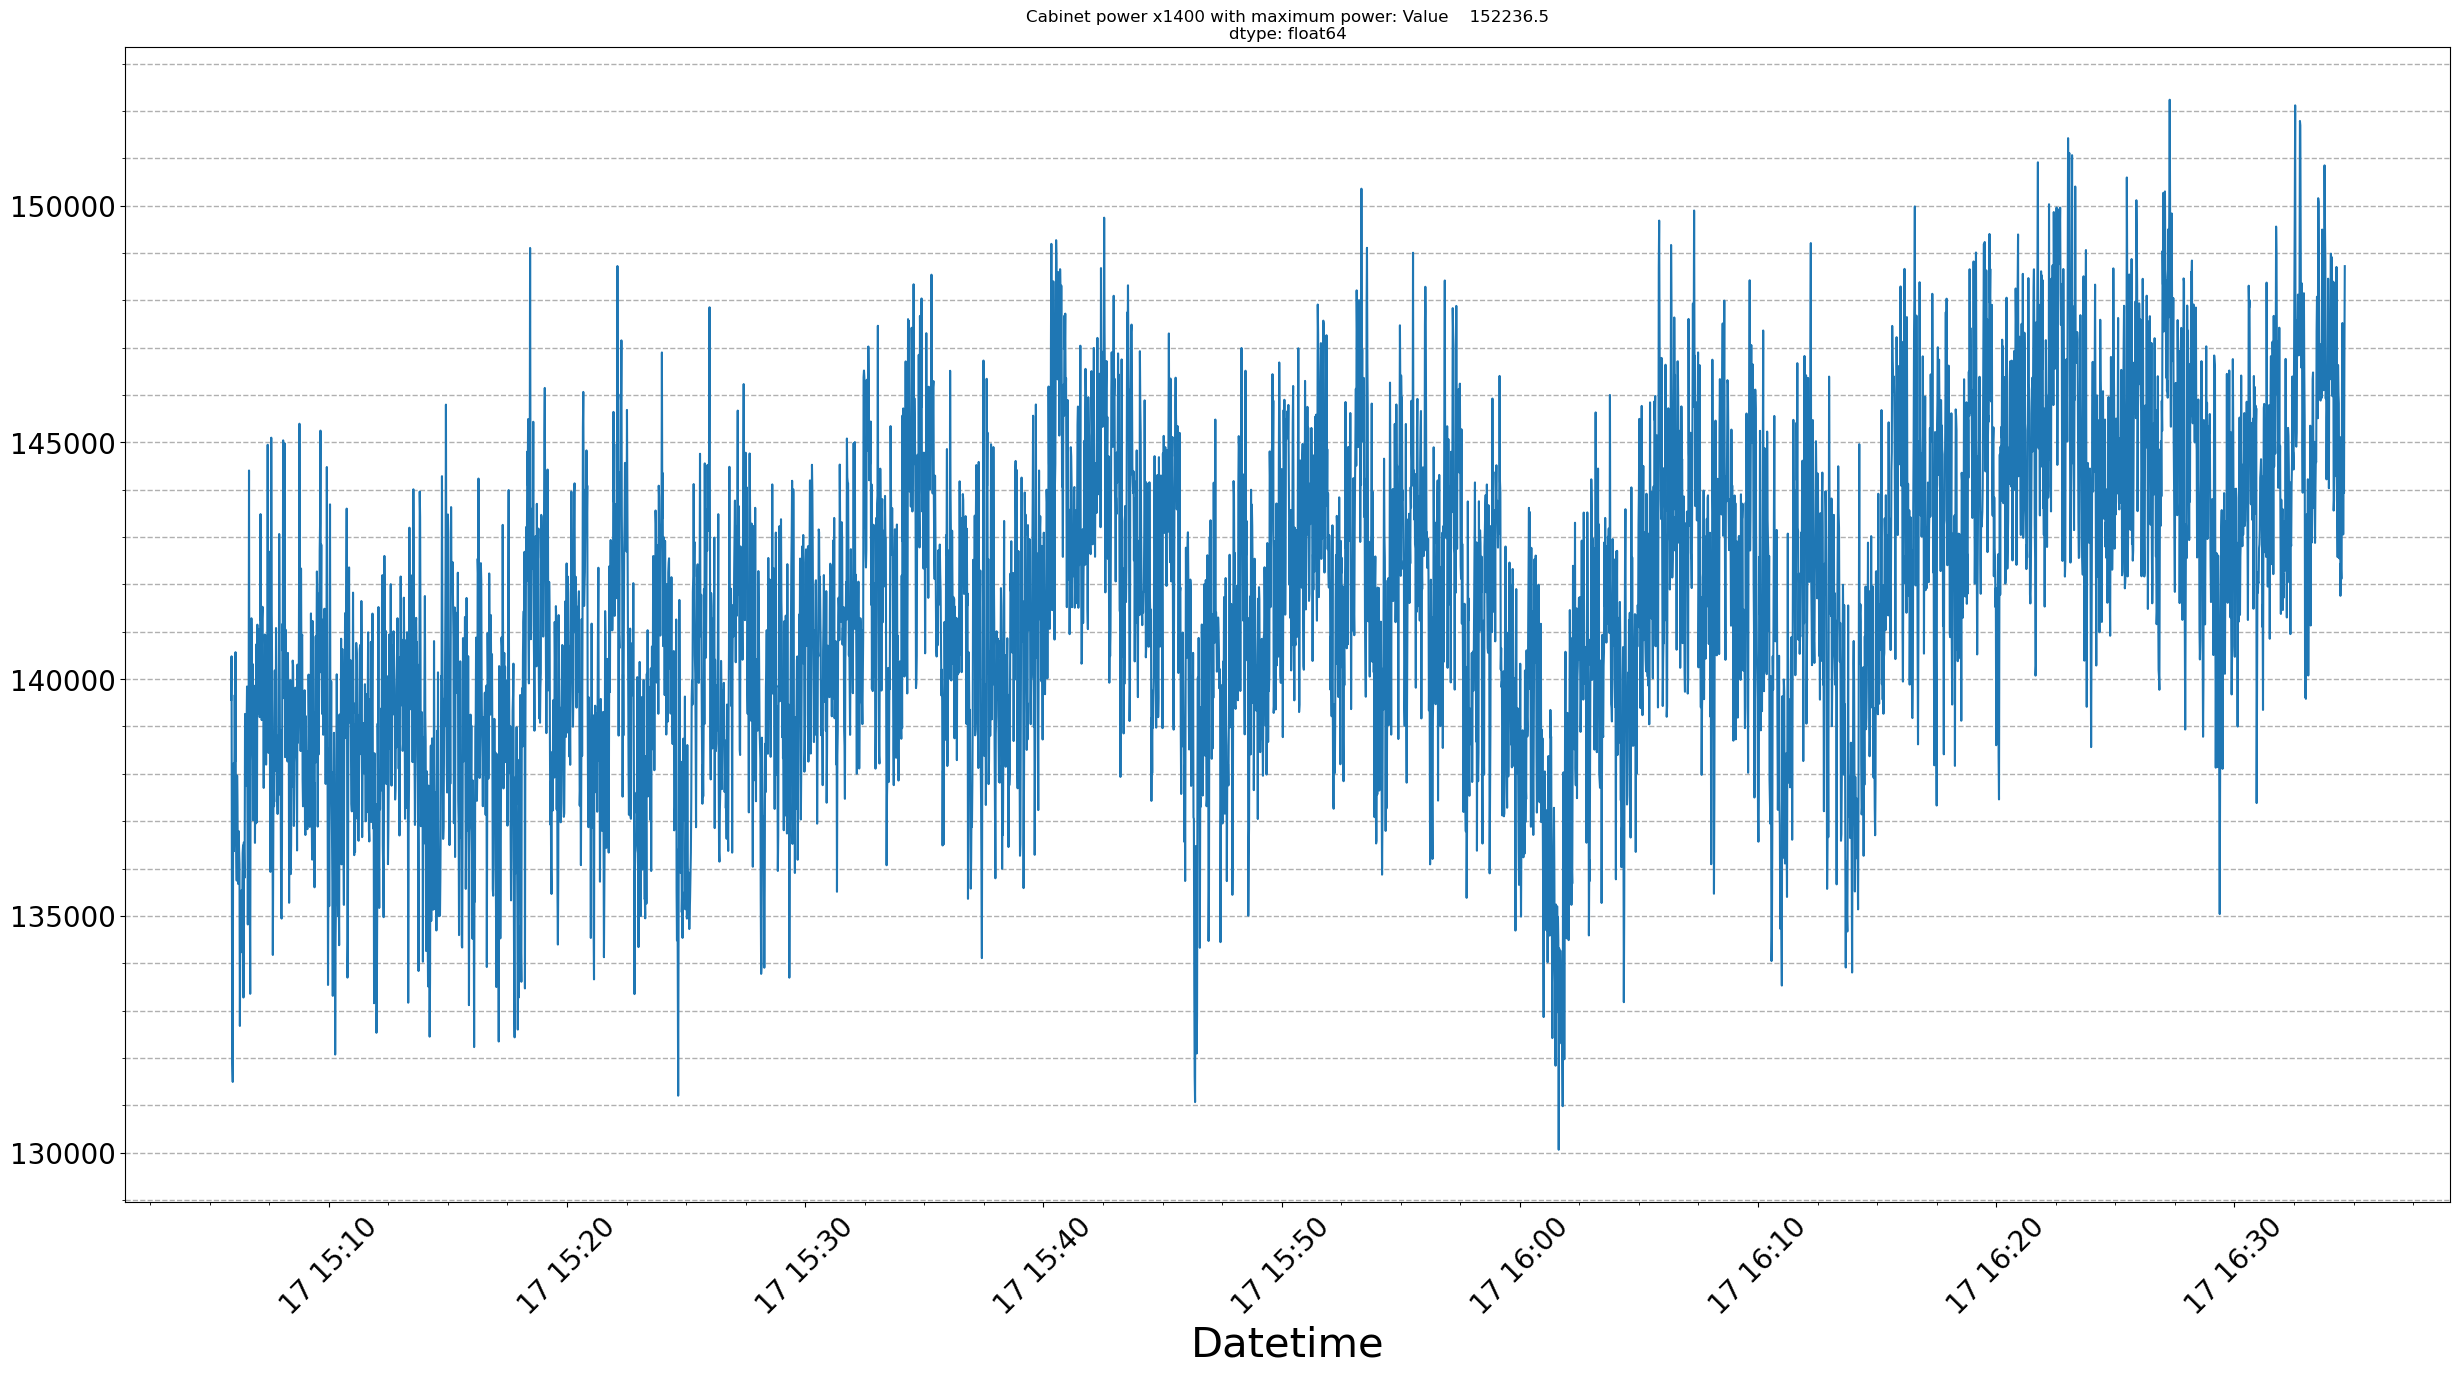

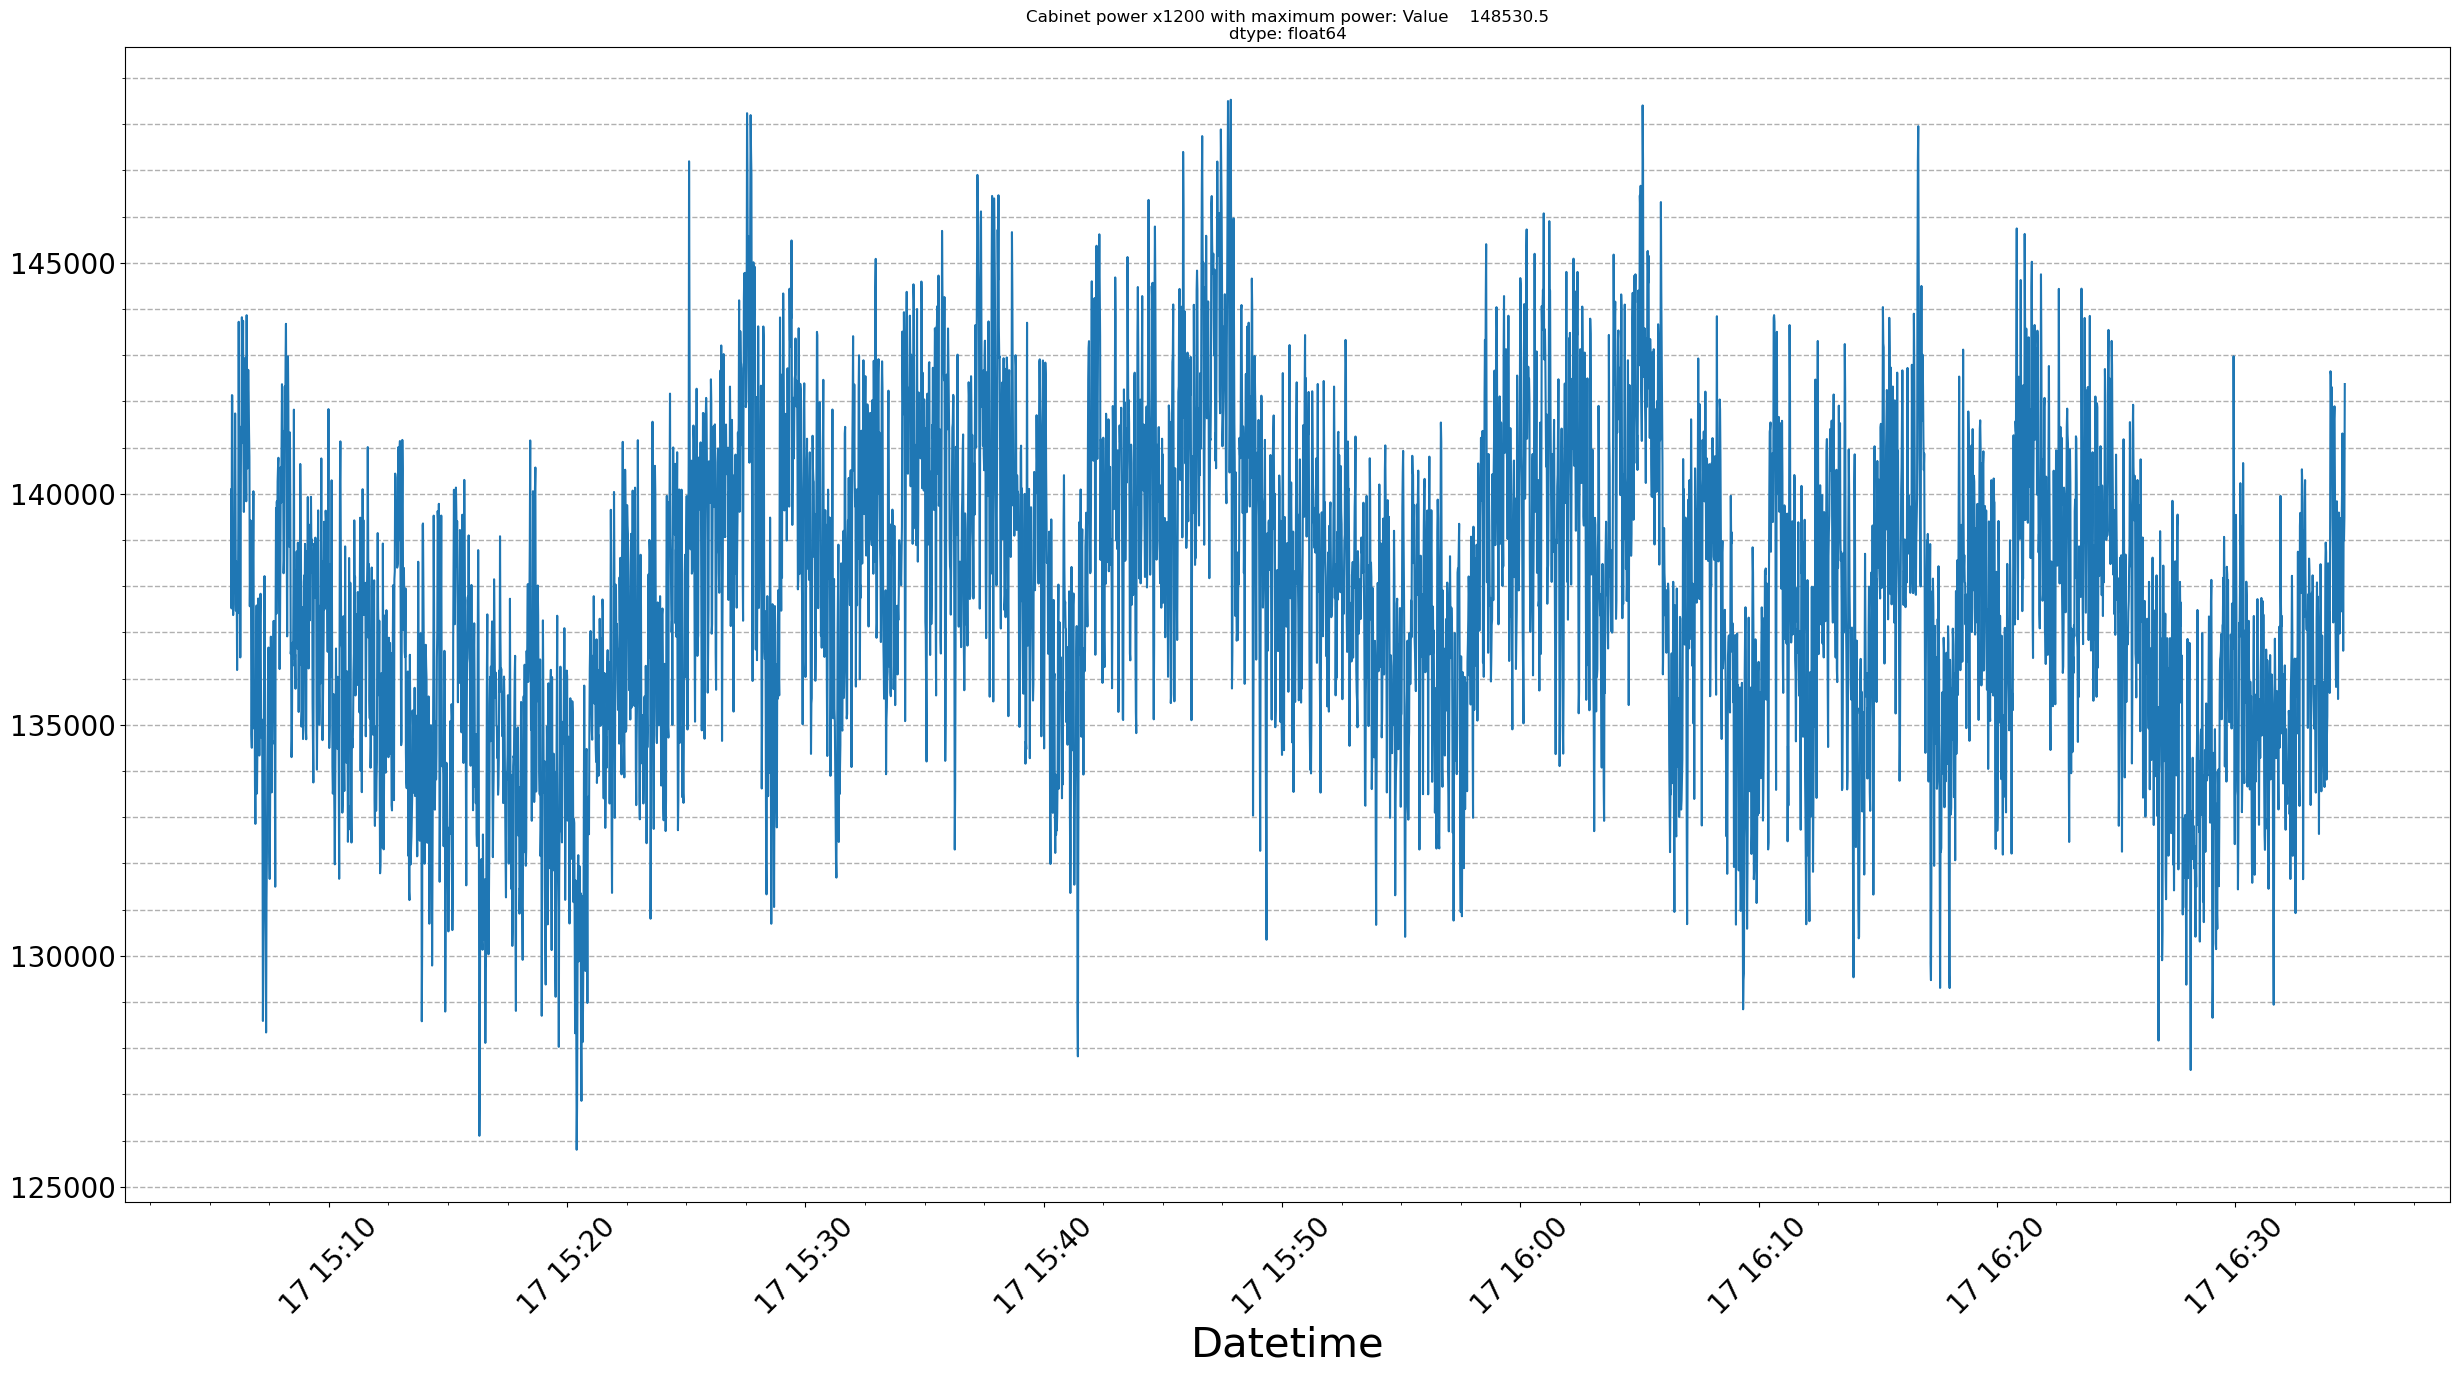

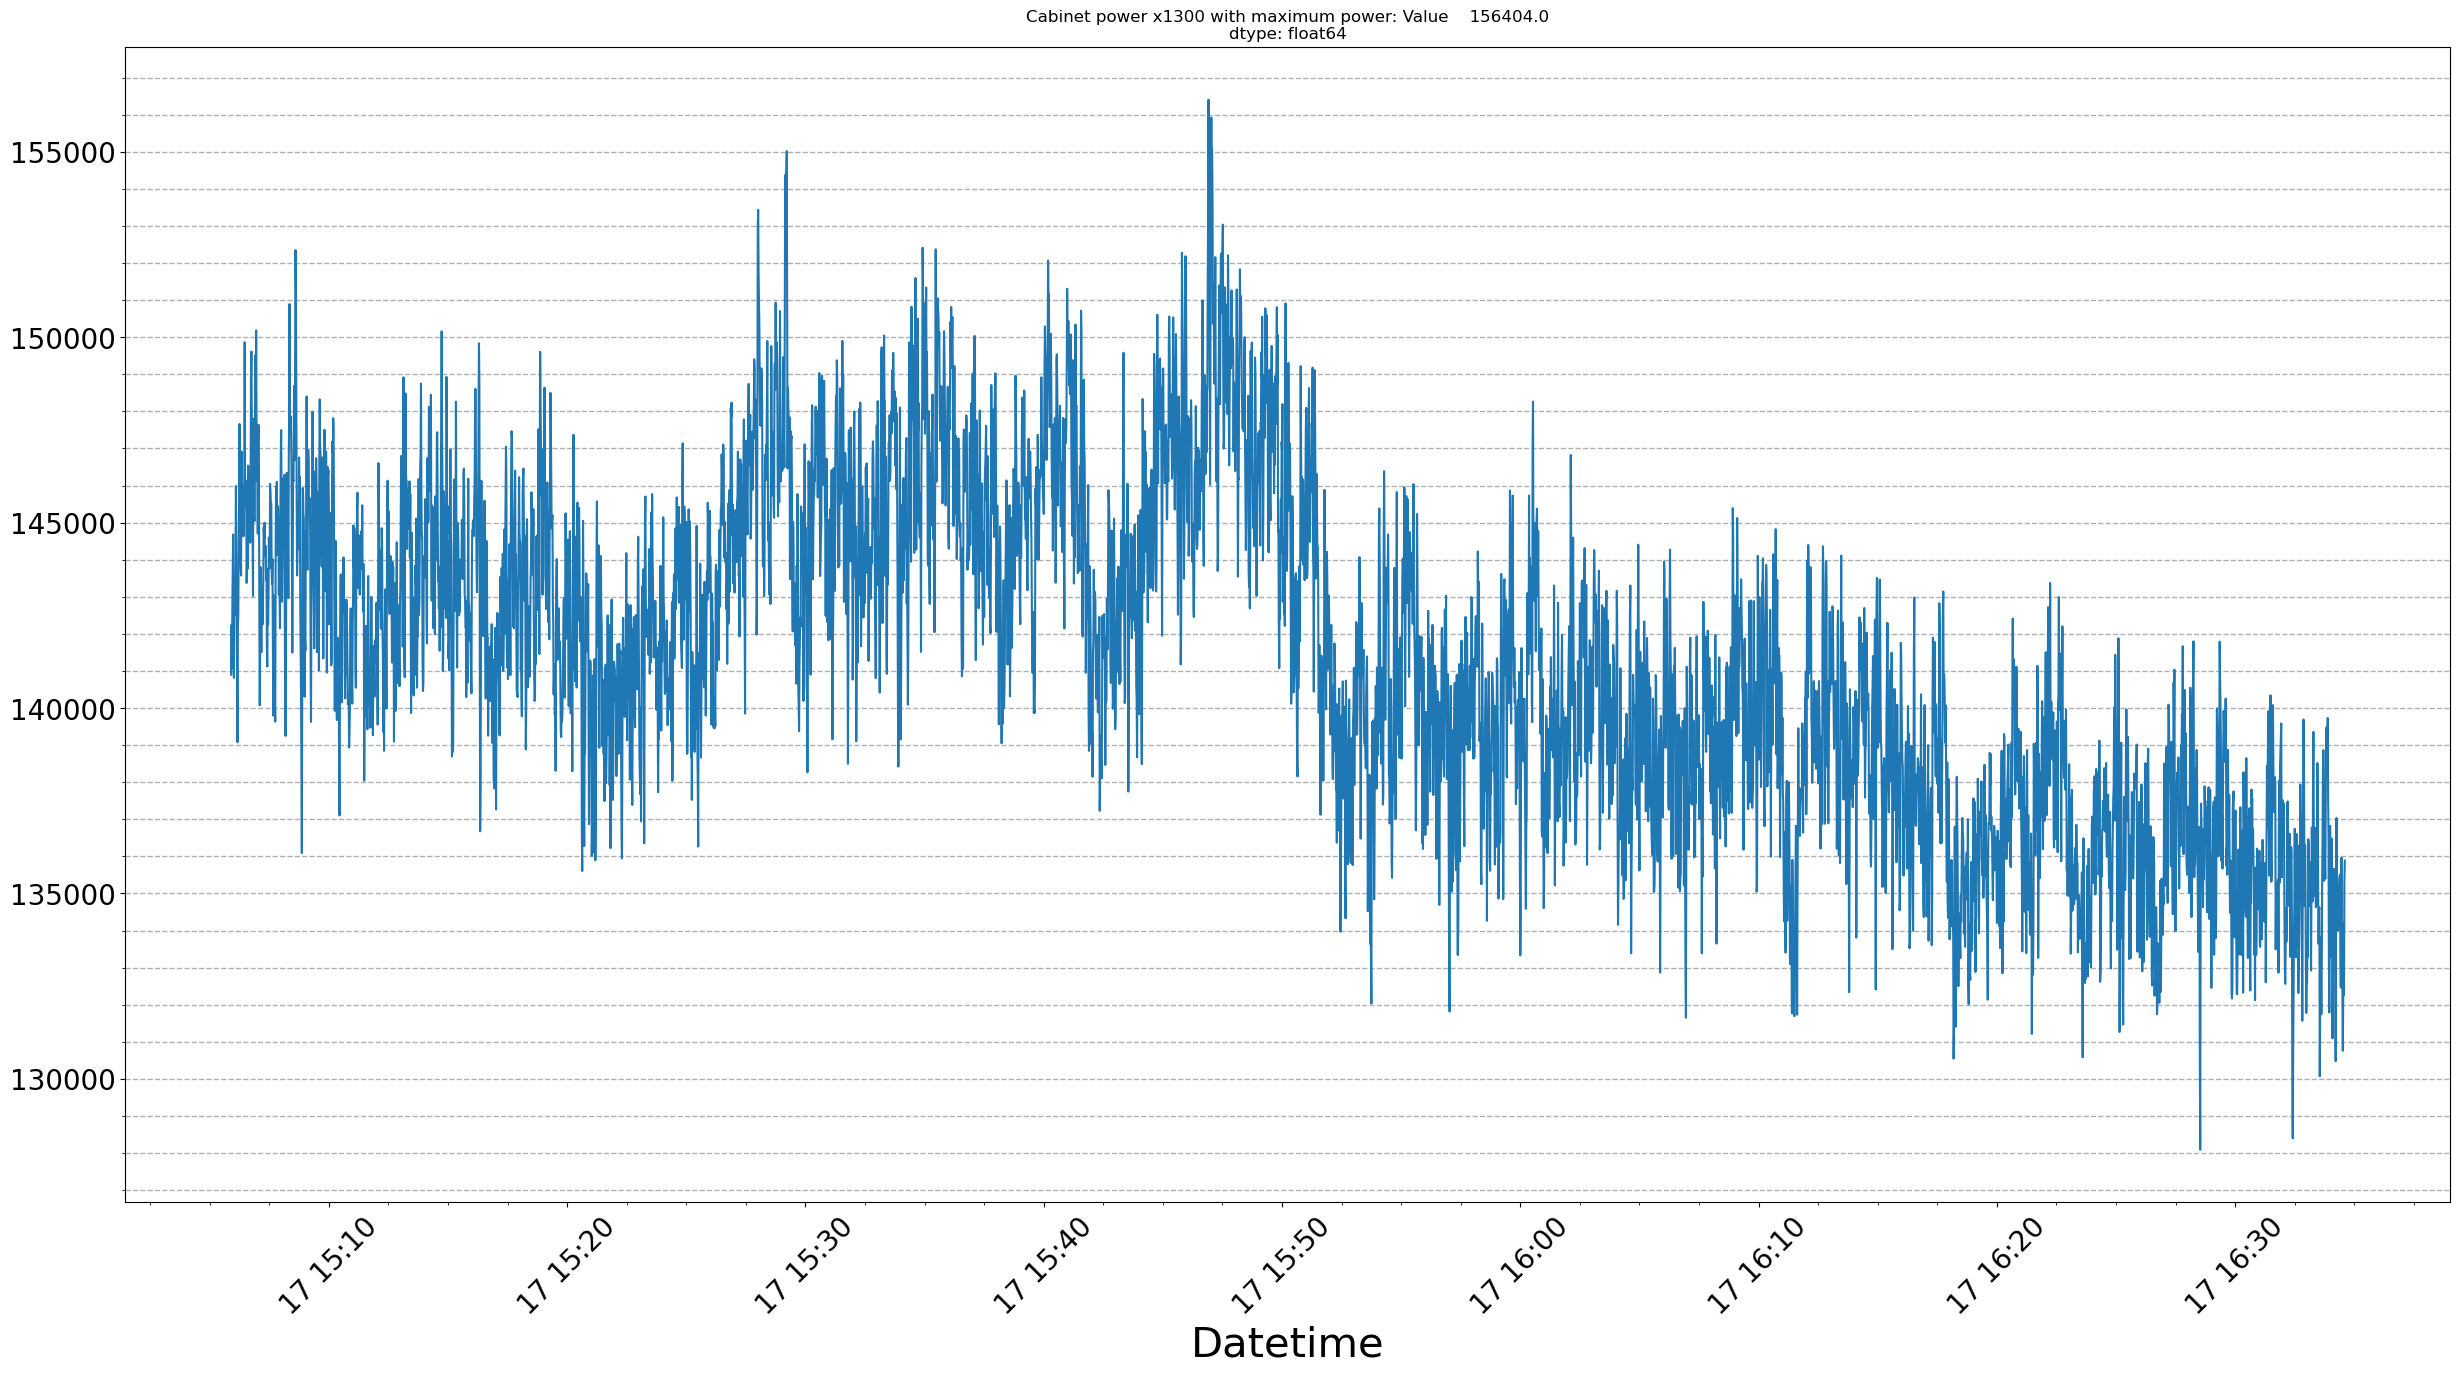

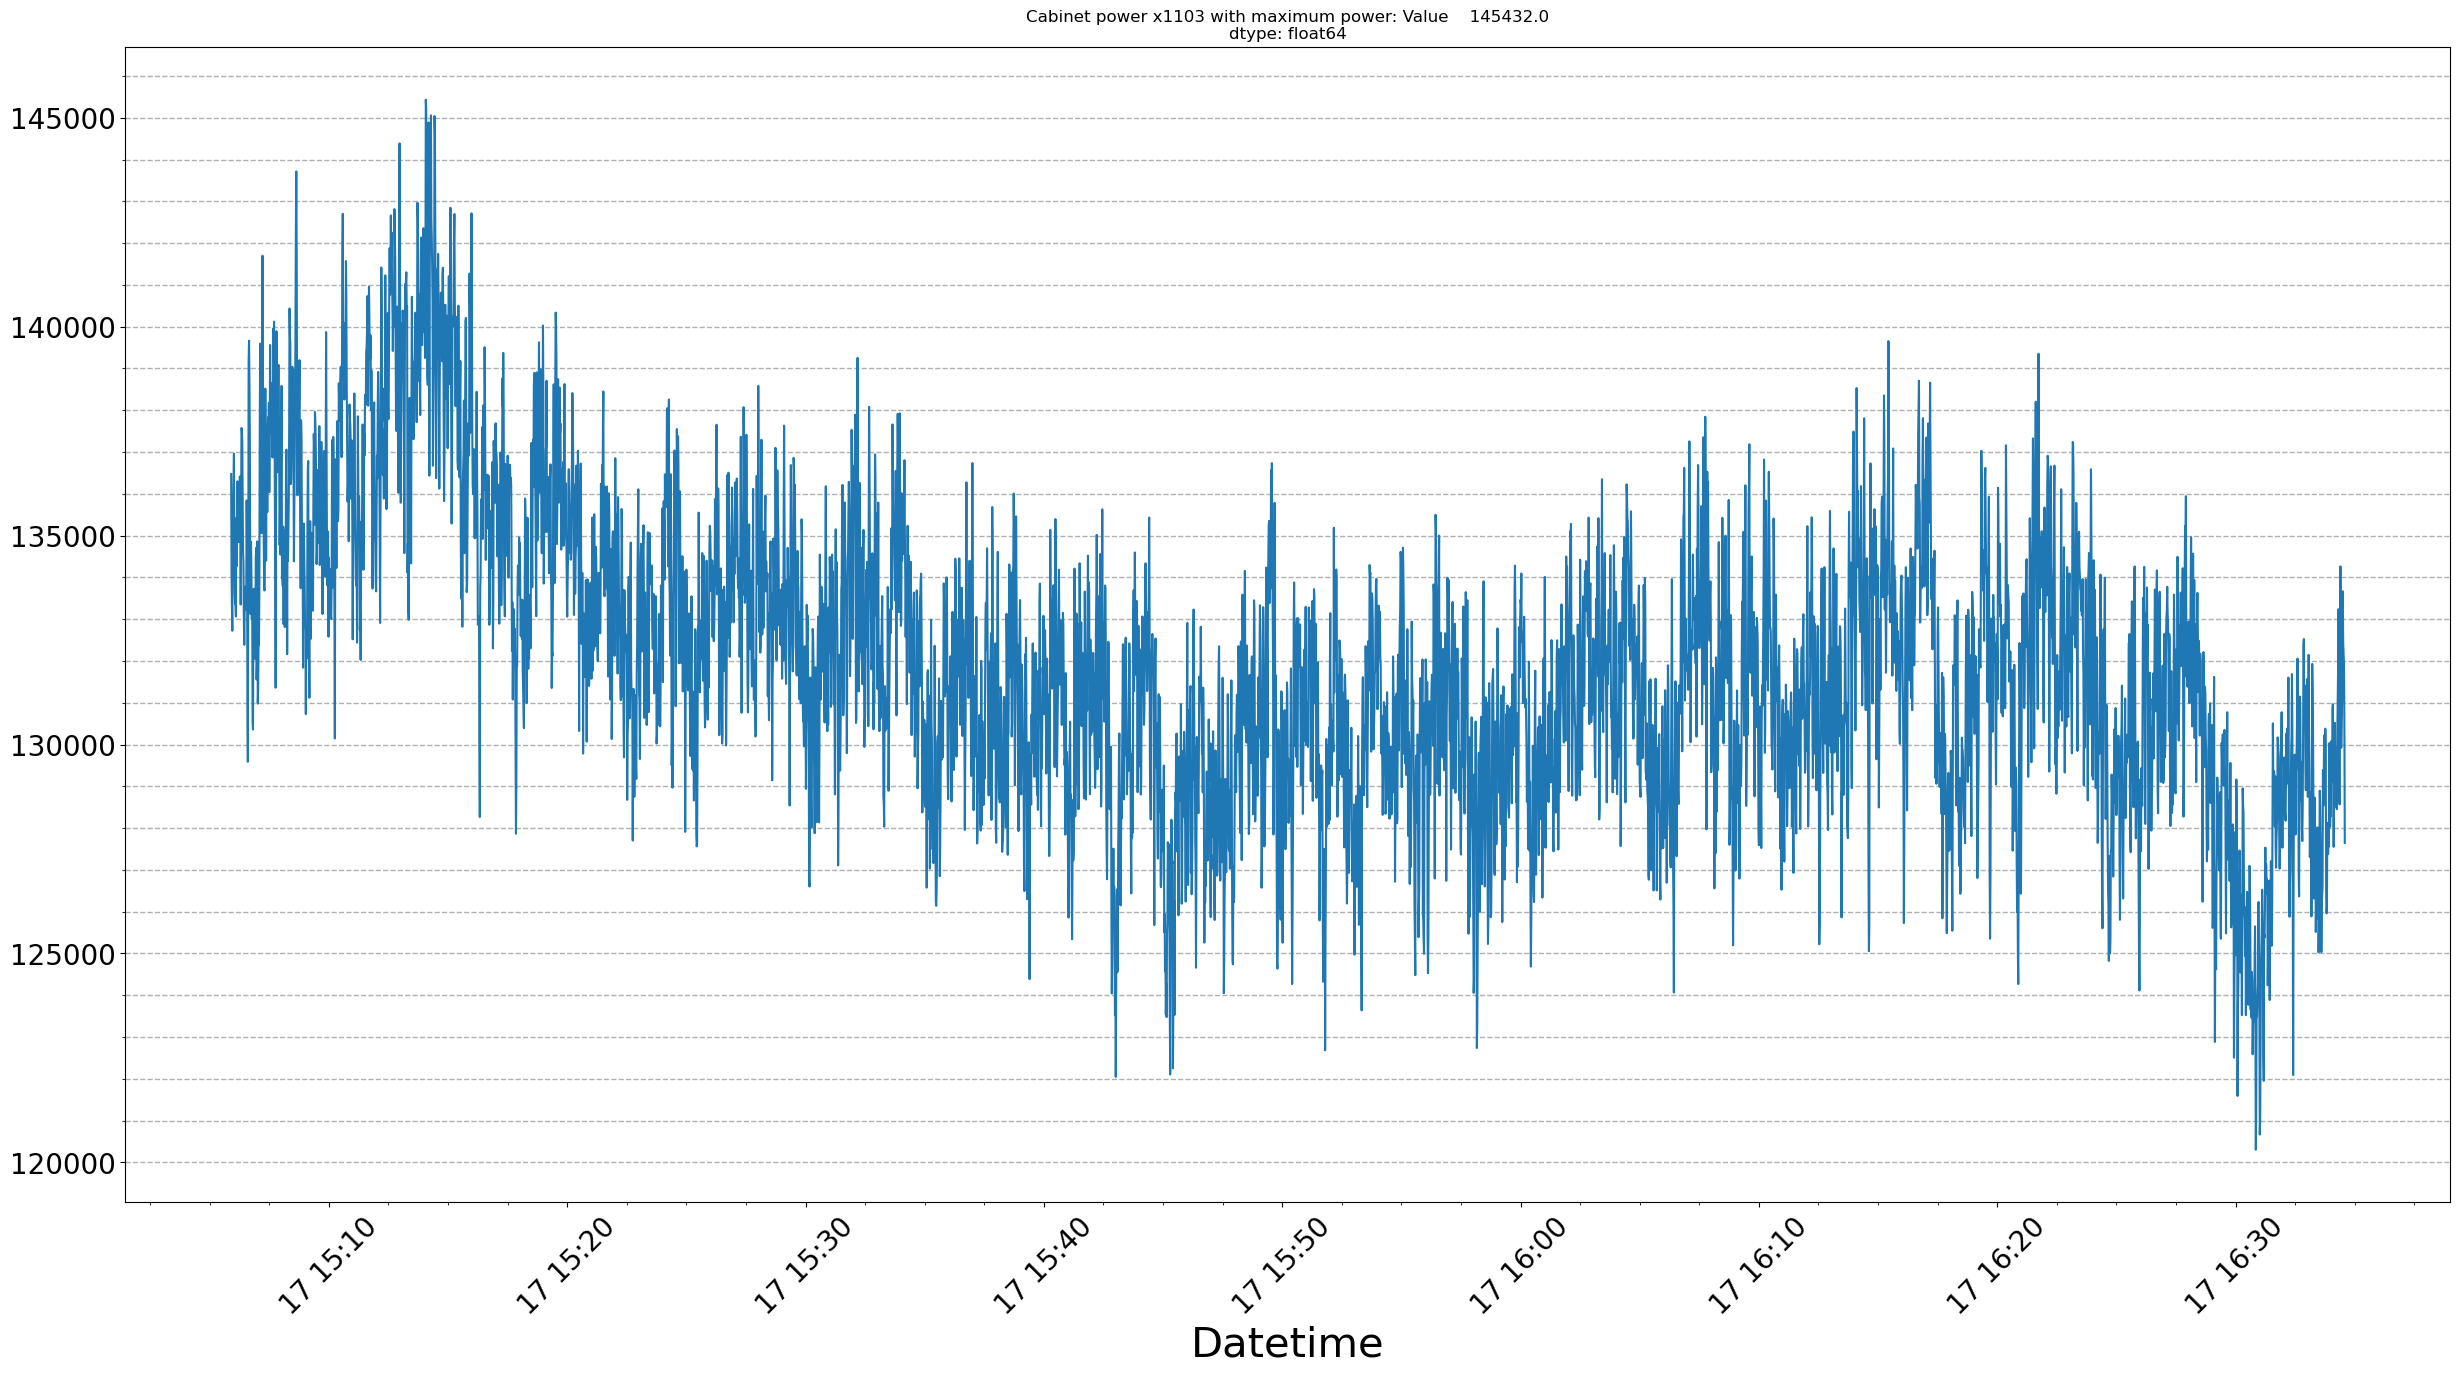

In [ ]:
def check(x):
    if len(x.dropna())==0:
        return 0
    else:
        return x

### DATA PER CHASSIS ON EVERY RECTIFIER ARE EVERY 1-2 SECONDS!!!NO NEED FOR RESAMPLING+ WEIGHTED AVERAGE

###PER SALVARE I DATI RAW TOGLIERE IL COMMENTO ALLA LINEA SOTTO
#df_dataC.to_csv('data12_4_2024.csv',header=True,index=True)
for name in os.listdir(directory):
    if '.csv' in name:
        data=pd.read_csv(directory+'/'+name,skiprows=1,header=None)
        data=data.iloc[:-1,:]
        data.columns=['Location','Type','ReadingType','Measure','Timestamp', 'Value']
        data['Timestamp']=pd.to_datetime(data['Timestamp'],format="%Y-%m-%dT%H:%M:%S.%fZ")+dt.timedelta(hours=2)
        data=data.set_index('Timestamp')
        df=data
        new=df['Location'].str.split('c',n=2,expand=True)
        print(data)
        j=0
        cabinet_list=new.iloc[:,0].unique()
        chassis_list=new.iloc[:,1].unique()
        cabinet=0
        # print(chassis_list)
        for cab in cabinet_list:
            i=0
        # chassis_list=df_dataC[df_dataC["_source.Sensor.LocationDetail.Cabinet"]==cab]['_source.Sensor.LocationDetail.Chassie'].unique()
            for ch in chassis_list:
                df_c=df[(df['Location'].str.contains(str(cab)+'c'+str(ch)))& (df["ReadingType"].str.contains('InputPower'))]
                rectifier_list=df_c['ReadingType'].unique()
                if len(rectifier_list)==4:
                    df_c0=pd.DataFrame(df_c[df_c['ReadingType'].str.contains('0')]['Value']).resample('1S').mean().fillna(method='ffill')
                    df_c1=pd.DataFrame(df_c[df_c['ReadingType'].str.contains('1')]['Value']).resample('1S').mean().fillna(method='ffill')
                    df_c2=pd.DataFrame(df_c[df_c['ReadingType'].str.contains('2')]['Value']).resample('1S').mean().fillna(method='ffill')
                    df_c3=pd.DataFrame(df_c[df_c['ReadingType'].str.contains('3')]['Value']).resample('1S').mean().fillna(method='ffill')
                # print(df_c0)
                    if i==0:
                        dfch=check(df_c0)+check(df_c1)+check(df_c2)+check(df_c3)
                    else: 
                        dfch=dfch+check(df_c0)+check(df_c1)+check(df_c2)+check(df_c3)
                else:
                    df_c0=pd.DataFrame(df_c[df_c['ReadingType'].str.contains('0')]['Value']).resample('1S').mean().fillna(method='ffill')
                    df_c1=pd.DataFrame(df_c[df_c['ReadingType'].str.contains('1')]['Value']).resample('1S').mean().fillna(method='ffill')
                    df_c2=pd.DataFrame(df_c[df_c['ReadingType'].str.contains('2')]['Value']).resample('1S').mean().fillna(method='ffill')
                    if i==0:
                        dfch=check(df_c0)+check(df_c1)+check(df_c2)
                    else: 
                        dfch=dfch+check(df_c0)+check(df_c1)+check(df_c2)
                i=i+1
            cabinet=dfch
            cabinet.columns=['Value']
            cabinet.index.name='time'
            plt.figure(figsize=(30, 15))
            plt.plot(cabinet.index,cabinet.Value)
            plt.yticks(fontsize=20)
            plt.xticks(rotation=45,fontsize=20)
            plt.title('Cabinet power '+str(cab)+' with maximum power: ' + str(cabinet.max()))
            plt.xlabel('Datetime',fontsize=30)
            plt.grid(axis='y',which='both',linewidth=1,linestyle='dashed')
            plt.minorticks_on()
            plt.savefig('plots/cabinet'+str(cab)+'.png',bbox_inches='tight',dpi=300)
            plt.show()
            plt.close()
            if j==0:
                cabinets=cabinet
            else:
                cabinets=cabinets+cabinet
            j=j+1
        cabinets.columns=['Value']
        cabinets.index.name='time'
        cabinets.plot(figsize=(30,15),fontsize=30)
        plt.title('total Cabinet power '+str(cabinet_list[:])+' with maximum power: ' + str(cabinets.max()),fontsize=30)
        plt.xlabel('Datetime',fontsize=30)
        plt.grid(axis='y',which='both',linewidth=1,linestyle='dashed')
        plt.savefig('plots/cabinet'+str(cabinet_list)+'.png',bbox_inches='tight',dpi=300)
        plt.minorticks_on()
        print('tot cabinets - maximum '+str(cabinets.max()))

      


### FM  DATA COMPARISON

In [ ]:
# fm=pd.read_csv('x1102_FM_power.csv',skiprows=1)

# fm=fm.iloc[:,0:3]

# fm

# fm['Timestamp']=fm['Data']+'T'+fm['Ora']

# fm

# fm['Timestamp']=pd.to_datetime(fm['Timestamp'],format="%d.%m.%YT%H:%M:%S")

In [ ]:
# plt.figure(figsize=(30, 15))
# plt.plot(fm.iloc[17000:24000,:]['Timestamp'],fm.iloc[17000:24000,:]['PT (1 s)\nW'],linewidth=2)